### Faculdade de Engenharia Industrial - FEI

### Centro Universitário da Fundação Educacional Inaciana "Padre Sabóia de Medeiros" (FEI)


*FEI's Stricto Sensu Graduate Program in Electrical Engineering*

Concentration area: ARTIFICIAL INTELLIGENCE APPLIED TO AUTOMATION AND ROBOTICS

Master's thesis student Andre Luiz Florentino

***

## Check for GPU

In [1]:
import tensorflow as tf
#tf.config.run_functions_eagerly(True)

print(tf.__version__)

pd = tf.config.experimental.list_physical_devices()
for i in pd:
    print(i)
print('------------------------------------------------------------------------------------------')


print(tf.config.list_physical_devices('GPU'))
# [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

print(tf.test.is_built_with_cuda)
# <function is_built_with_cuda at 0x000001AA24AFEC10>

print(tf.test.gpu_device_name())
# /device:GPU:0

#gvd = tf.config.get_visible_devices()
for j in tf.config.get_visible_devices():
    print(j)
# PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
# PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

physical_devices = tf.config.experimental.list_physical_devices()
tf.config.experimental.set_memory_growth(physical_devices[2], True)

2.3.0
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')
------------------------------------------------------------------------------------------
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
<function is_built_with_cuda at 0x000002D1247040D0>
/device:GPU:0
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


# Chapter 6: Neural networks

***

## Importe modules

In [2]:
import librosa
import os
import warnings
import itertools
import time
import sys
import pickle

import pandas     as pd
import seaborn    as sns
import numpy      as np

from matplotlib  import pyplot  as plt
from keras       import backend as K

from tqdm                        import tqdm
from collections                 import Counter

from sklearn                     import metrics
from sklearn.model_selection     import train_test_split
from sklearn.metrics             import confusion_matrix, classification_report
from sklearn.decomposition       import PCA

from tensorflow                  import keras
from tensorflow.keras.models     import Sequential, load_model
from tensorflow.keras.layers     import Dense, Dropout, Conv1D, GlobalAveragePooling1D, MaxPooling1D, Flatten, GlobalMaxPooling1D

from keras.callbacks             import ModelCheckpoint, EarlyStopping
from keras.regularizers          import l2


warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

pd.set_option('display.max_columns', 9)
pd.set_option('display.width', 300)
pd.set_option('display.max_colwidth', 120)

cmap_cm   = plt.cm.Blues

In [3]:
# Globals
current_path = os.getcwd()

# For the picture names
pic_first_name = '06_Neural_network_'

# For Librosa
FRAME_SIZE  = 1024
HOP_LENGTH  = 512
SEED        = 1000
SR          = 22050

## Loading the dataset


In [4]:
# Select the dataset

opc = 0
while str(opc) not in '1234':
    print()
    print("1-) ESC-10")
    print("2-) BDLib2")
    print("3-) US8K")
    print("4-) US8K_AV")


    opc = input("\nSelect the dataset: ")
    if opc.isdigit():
        opc = int(opc)
    else:
        opc = 0

if opc == 1:

    path        = os.path.join(current_path, "_dataset", "ESC-10")
    path_pic    = os.path.join(current_path, "ESC-10_results")
    path_models = os.path.join(current_path, "ESC-10_saved_models")
    
   
    subfolders  = next(os.walk(path))[1]
    nom_dataset = 'ESC-10' 
    csv_file    = 'ESC-10.csv'
    fold        = '1'

    pkl_features          = 'ESC-10_features_original.pkl'
    pkl_aug_features      = 'ESC-10_features_augmented_no_windowing.pkl'
    pkl_aug_wind_features = 'ESC-10_features_augmented.pkl'

    
if opc == 2:
    
    path        = os.path.join(current_path, "_dataset", "BDLib2")
    path_pic    = os.path.join(current_path, "BDLib2_results")
    path_models = os.path.join(current_path, "BDLib2_saved_models")

    subfolders  = next(os.walk(path))[1]
    nom_dataset = 'BDLib2' 
    csv_file    = 'BDLib2.csv'
    fold        = 'fold-1'

    pkl_features          = 'BDLib2_features_original.pkl'
    pkl_aug_features      = 'BDLib2_features_augmented_no_windowing.pkl'
    pkl_aug_wind_features = 'BDLib2_features_augmented.pkl'

    
if opc == 3:
    
    path        = os.path.join(current_path, "_dataset", "US8K")
    path_pic    = os.path.join(current_path, "US8K_results")
    path_models = os.path.join(current_path, "US8K_saved_models")
    
    subfolders  = next(os.walk(path))[1]
    nom_dataset = 'US8K' 
    csv_file    = 'US8K.csv'
    fold        = '1'
    
    pkl_features          = 'US8K_features_original.pkl'
    pkl_aug_features      = 'US8K_features_augmented_no_windowing.pkl'
    pkl_aug_wind_features = 'US8K_features_windowed.pkl' # augmented and windowed makes no sense. Dataset is already quite large
    

if opc == 4:

    path        = os.path.join(current_path, "_dataset", "US8K_AV")
    path_pic    = os.path.join(current_path, "US8K_AV_results")
    path_models = os.path.join(current_path, "US8K_AV_saved_models")

    subfolders  = next(os.walk(path))[1]
    nom_dataset = 'US8K_AV' 
    csv_file    = 'US8K_AV.csv'
    fold        = '1'

    pkl_features          = 'US8K_AV_features_original.pkl'
    pkl_aug_features      = 'US8K_AV_features_augmented_no_windowing.pkl'
    pkl_aug_wind_features = 'US8K_AV_features_windowed.pkl' # augmented and windowed makes no sense. Dataset is already quite large


1-) ESC-10
2-) BDLib2
3-) US8K
4-) US8K_AV

Select the dataset: 4


In [5]:
def get_next_file_number(folder: str):
    files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f)) and f.startswith(pic_first_name)]
    if not files:
        return 1
    else:
        numbers = [int(f.split('.')[0].split('_')[-1]) for f in files]
        return max(numbers) + 1

In [6]:
from MT_loadDataset import loadDataset

In [7]:
loadDataset = loadDataset(path)
DB          = loadDataset.db_B

print("\nClasses:\n--------------------")
print(DB["Class_categorical"].value_counts())
print("\nTotal number of unique files..........: ", len(np.unique(DB["File_name"])))
print("Total number of AUDIO files...........: ", len(DB))
DB


Classes:
--------------------
Class_categorical
dog_bark            1000
children_playing    1000
background          1000
siren                929
silence              550
car_horn             429
Name: count, dtype: int64

Total number of unique files..........:  4908
Total number of AUDIO files...........:  4908


,Fold,Folder_name,Class_OHEV,Class_categorical,File_name,Path
0,5,fold5,"[0, 0, 0, 1, 0, 0]",dog_bark,100032-3-0-0.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100032-3-0-0.wav
1,5,fold5,"[0, 0, 1, 0, 0, 0]",children_playing,100263-2-0-117.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-117.wav
2,5,fold5,"[0, 0, 1, 0, 0, 0]",children_playing,100263-2-0-121.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-121.wav
3,5,fold5,"[0, 0, 1, 0, 0, 0]",children_playing,100263-2-0-126.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-126.wav
4,5,fold5,"[0, 0, 1, 0, 0, 0]",children_playing,100263-2-0-137.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\100263-2-0-137.wav
...,...,...,...,...,...,...
4903,9,fold9,"[0, 0, 0, 0, 1, 0]",silence,708192_10.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_10.wav
4904,9,fold9,"[0, 0, 0, 0, 1, 0]",silence,708192_11.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_11.wav
4905,9,fold9,"[0, 0, 0, 0, 1, 0]",silence,708192_12.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_12.wav
4906,9,fold9,"[0, 0, 0, 0, 1, 0]",silence,708192_8.wav,C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K_AV\Folds\fold9\708192_8.wav


In [8]:
DB.dtypes

Fold                  int64
Folder_name          object
Class_OHEV           object
Class_categorical    object
File_name            object
Path                 object
dtype: object

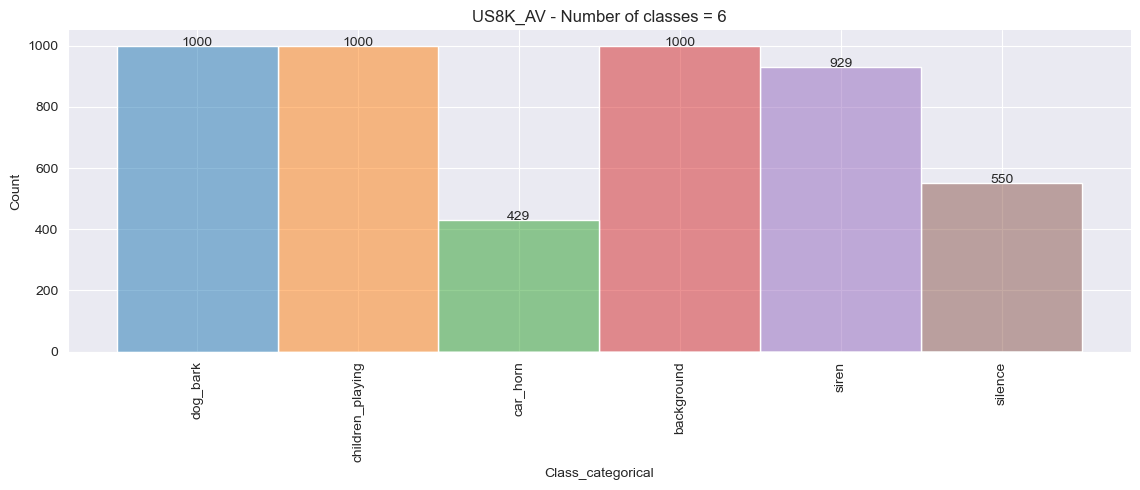

In [9]:
# Analysis of the class balancing

sns.set_style("darkgrid")
gTitle = f'{nom_dataset} - Number of classes = ' + str(len(pd.Series(DB['Class_categorical']).unique()))
g = sns.displot(DB,x='Class_categorical', hue='Class_categorical',height = 5, aspect = 2).set(title=gTitle)
g.set_xticklabels(rotation=90)
g.set_titles('Number of classes')

# Retrieve the axes object from the plot
axes = g.ax

# Iterate over each bar in the plot
for p in axes.patches:
    # Get the coordinates of the bar
    width = p.get_width()
    height = p.get_height()
    cord_x, cord_y = p.get_xy()
    if height > 0:
        axes.annotate(f'{height}', (cord_x + width/2, cord_y + height), ha='center')
        
g._legend.remove()

plt.tight_layout()

In [10]:
# Read the pkl file with the augmented features extracted

opc = 0
while str(opc) not in '123':
    print()
    print("1-) Features original")
    print("2-) Features augmented")
    print("3-) Features augmented and windowed (US8K is only windowed)")

    opc = input("\nSelect the dataset: ")
    if opc.isdigit():
        opc = int(opc)
    else:
        opc = 0

if opc == 1:
    DB_from_pkl   = pd.read_pickle(os.path.join(path_models, pkl_features))
    model_surname = '_original'

if opc == 2:
    DB_from_pkl   = pd.read_pickle(os.path.join(path_models, pkl_aug_features))
    model_surname = '_augmented'

if opc == 3:
    DB_from_pkl = pd.read_pickle(os.path.join(path_models, pkl_aug_wind_features))
    model_surname = '_windowed'


1-) Features original
2-) Features augmented
3-) Features augmented and windowed (US8K is only windowed)

Select the dataset: 3


In [11]:
DB_from_pkl.dtypes

Audio                  object
Class_categorical      object
Class_OHEV             object
Fold                   object
RMSE                  float64
                       ...   
TONNETZ_6             float64
TONNETZ_std_6         float64
TONNETZ_median_6      float64
TONNETZ_skew_6        float64
TONNETZ_kurtosis_6    float64
Length: 379, dtype: object

In [12]:
total_duration = 0
for audio in DB_from_pkl['Audio']:
    total_duration = total_duration + librosa.get_duration(y=audio)
print('Total duration of the dataset: ' , "{:0.4f} h".format(total_duration / 3600))

Total duration of the dataset:  9.5286 h


In [13]:
DB_from_pkl

,Audio,Class_categorical,Class_OHEV,Fold,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
0,"[-0.0034710653, -0.0050192624, -0.004654482, -0.0049833283, -0.0038681468, -0.0023575649, -0.00025486574, 0.00135406...",dog_bark,"[0, 0, 0, 1, 0, 0]",5,...,0.025644,-0.046785,0.461191,-0.338882
1,"[-0.015428771, -0.0064468235, -0.002025701, -0.009768408, -0.020482529, -0.03246226, -0.046539657, -0.050950672, -0....",dog_bark,"[0, 0, 0, 1, 0, 0]",5,...,0.026433,-0.030688,0.414979,-0.840459
2,"[-0.17165461, -0.1961453, -0.2095497, -0.116395764, 0.02499168, 0.15181583, 0.2456393, 0.24304995, 0.1697193, 0.0706...",dog_bark,"[0, 0, 0, 1, 0, 0]",5,...,0.023640,-0.045384,0.629947,0.096665
3,"[-0.004147315, -0.014180049, -0.016550057, -0.017083425, -0.010863152, -0.0018686495, 0.006234308, 0.00725661, 0.005...",dog_bark,"[0, 0, 0, 1, 0, 0]",5,...,0.024617,-0.025407,0.554764,-0.364067
4,"[-0.047271818, -0.08598116, -0.08329079, -0.15244874, -0.21367016, -0.26584676, -0.19677721, -0.17195633, -0.0841544...",dog_bark,"[0, 0, 0, 1, 0, 0]",5,...,0.024934,-0.036388,0.770805,0.232676
...,...,...,...,...,...,...,...,...,...
34351,"[-0.0013713251, -0.0009226998, -0.0006403711, -0.0005783211, -0.0006910372, -0.00091834716, -0.0010323625, -0.000976...",silence,"[0, 0, 0, 0, 1, 0]",9,...,0.013994,-0.018363,-0.710840,-0.875780
34352,"[0.0015545484, 0.001670274, 0.0018922735, 0.0021141772, 0.002221069, 0.002072654, 0.0018563501, 0.0018253133, 0.0019...",silence,"[0, 0, 0, 0, 1, 0]",9,...,0.010918,0.001000,-0.683456,-0.967157
34353,"[-0.0010607778, -0.0006731042, -0.00053357193, -0.0006793465, -0.00088371243, -0.00095680775, -0.0009278627, -0.0008...",silence,"[0, 0, 0, 0, 1, 0]",9,...,0.016168,0.004923,0.232408,-1.142400
34354,"[-0.00025361695, -0.00036392454, -0.0002459652, 0.000116177835, 0.0004521357, 0.0005208538, 0.0003343413, 5.40631e-0...",silence,"[0, 0, 0, 0, 1, 0]",9,...,0.017644,0.019569,-0.490374,-0.357968


In [14]:
print(type(DB_from_pkl['Fold'][0][0]))
print(type(DB_from_pkl['Class_OHEV'][0][0]))
print(type(DB_from_pkl['Class_OHEV'][0]))

<class 'str'>
<class 'numpy.int32'>
<class 'numpy.ndarray'>


## Input split

In [15]:
# Separate 1 fold for validation and create a DB for the training / testing according to the datasets specification

DB_from_pkl_VAL = DB_from_pkl[DB_from_pkl['Fold'] == fold].copy()
DB_from_pkl_TRN = DB_from_pkl[DB_from_pkl['Fold'] != fold].copy()

In [16]:
print(len(DB_from_pkl_VAL))
print(len(DB_from_pkl_TRN))
print('Total: ', len(DB_from_pkl_VAL) + len(DB_from_pkl_TRN),'\n')

3346
31010
Total:  34356 



In [17]:
DB_from_pkl_VAL

,Audio,Class_categorical,Class_OHEV,Fold,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
231,"[6.402111e-05, 8.269498e-05, 5.2123058e-05, 7.1509836e-05, 3.3138364e-05, -6.1828905e-07, -8.950657e-05, -9.0291964e...",dog_bark,"[0, 0, 0, 1, 0, 0]",1,...,0.019867,0.005833,0.230194,-0.774566
232,"[0.0005136457, 0.00041881658, 0.00034897702, 0.00021603762, 0.0002278979, 0.00011100468, 0.00010083006, 0.0001630317...",dog_bark,"[0, 0, 0, 1, 0, 0]",1,...,0.018672,0.009202,0.529034,0.970660
233,"[-5.3512427e-05, 2.2222208e-05, 2.7161423e-05, 0.00017825539, 0.00032240857, 0.00041231932, 0.0005614782, 0.00053010...",dog_bark,"[0, 0, 0, 1, 0, 0]",1,...,0.030452,-0.029692,0.291676,-0.927084
234,"[-9.721824e-05, -0.0002176053, -0.00031682133, -0.00042641407, -0.00044769727, -0.00042776082, -0.00044338158, -0.00...",dog_bark,"[0, 0, 0, 1, 0, 0]",1,...,0.031560,-0.005922,-0.290679,-1.082696
235,"[0.00023775743, 0.00023206181, 0.00023593163, 0.00017538742, 0.00011133426, 0.00021567091, 0.00011633049, 8.274122e-...",dog_bark,"[0, 0, 0, 1, 0, 0]",1,...,0.030058,0.002691,1.003930,1.476461
...,...,...,...,...,...,...,...,...,...
30837,"[0.0004533253, 0.0004609438, 0.00043082816, 0.0004680011, 0.00044090266, 0.0004159223, 0.00044615153, 0.00033951446,...",silence,"[0, 0, 0, 0, 1, 0]",1,...,0.039113,0.233184,-2.282457,4.259912
30838,"[0.00017956269, 0.00035041687, 0.00028244377, 0.00029154716, 0.00042117725, 0.00041305454, 0.00040095835, 0.00039254...",silence,"[0, 0, 0, 0, 1, 0]",1,...,0.039534,0.232674,-2.273420,4.254254
30839,"[-0.00011860943, -6.20941e-05, -8.068766e-05, -2.62707e-05, 2.1147845e-05, 7.191092e-05, 0.00010657643, 0.0001931514...",silence,"[0, 0, 0, 0, 1, 0]",1,...,0.038939,0.232747,-2.254844,4.165775
30840,"[-0.00036955072, -0.00043088698, -0.00031412364, -0.00035251322, -0.00031178963, -0.00029819133, -0.00025626598, -0....",silence,"[0, 0, 0, 0, 1, 0]",1,...,0.039959,0.233470,-2.309939,4.438597


In [18]:
DB_from_pkl_TRN

,Audio,Class_categorical,Class_OHEV,Fold,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
0,"[-0.0034710653, -0.0050192624, -0.004654482, -0.0049833283, -0.0038681468, -0.0023575649, -0.00025486574, 0.00135406...",dog_bark,"[0, 0, 0, 1, 0, 0]",5,...,0.025644,-0.046785,0.461191,-0.338882
1,"[-0.015428771, -0.0064468235, -0.002025701, -0.009768408, -0.020482529, -0.03246226, -0.046539657, -0.050950672, -0....",dog_bark,"[0, 0, 0, 1, 0, 0]",5,...,0.026433,-0.030688,0.414979,-0.840459
2,"[-0.17165461, -0.1961453, -0.2095497, -0.116395764, 0.02499168, 0.15181583, 0.2456393, 0.24304995, 0.1697193, 0.0706...",dog_bark,"[0, 0, 0, 1, 0, 0]",5,...,0.023640,-0.045384,0.629947,0.096665
3,"[-0.004147315, -0.014180049, -0.016550057, -0.017083425, -0.010863152, -0.0018686495, 0.006234308, 0.00725661, 0.005...",dog_bark,"[0, 0, 0, 1, 0, 0]",5,...,0.024617,-0.025407,0.554764,-0.364067
4,"[-0.047271818, -0.08598116, -0.08329079, -0.15244874, -0.21367016, -0.26584676, -0.19677721, -0.17195633, -0.0841544...",dog_bark,"[0, 0, 0, 1, 0, 0]",5,...,0.024934,-0.036388,0.770805,0.232676
...,...,...,...,...,...,...,...,...,...
34351,"[-0.0013713251, -0.0009226998, -0.0006403711, -0.0005783211, -0.0006910372, -0.00091834716, -0.0010323625, -0.000976...",silence,"[0, 0, 0, 0, 1, 0]",9,...,0.013994,-0.018363,-0.710840,-0.875780
34352,"[0.0015545484, 0.001670274, 0.0018922735, 0.0021141772, 0.002221069, 0.002072654, 0.0018563501, 0.0018253133, 0.0019...",silence,"[0, 0, 0, 0, 1, 0]",9,...,0.010918,0.001000,-0.683456,-0.967157
34353,"[-0.0010607778, -0.0006731042, -0.00053357193, -0.0006793465, -0.00088371243, -0.00095680775, -0.0009278627, -0.0008...",silence,"[0, 0, 0, 0, 1, 0]",9,...,0.016168,0.004923,0.232408,-1.142400
34354,"[-0.00025361695, -0.00036392454, -0.0002459652, 0.000116177835, 0.0004521357, 0.0005208538, 0.0003343413, 5.40631e-0...",silence,"[0, 0, 0, 0, 1, 0]",9,...,0.017644,0.019569,-0.490374,-0.357968


In [19]:
for i in DB_from_pkl_TRN.columns:
    print(i)

Audio
Class_categorical
Class_OHEV
Fold
RMSE
ZCR
CENTROIDS
BANDWIDTH
ROLLOFF
MEL_1
MEL_2
MEL_3
MEL_4
MEL_5
MEL_6
MEL_7
MEL_8
MEL_9
MEL_10
MEL_11
MEL_12
MEL_13
MEL_14
MEL_15
MEL_16
MEL_17
MEL_18
MEL_19
MEL_20
MEL_21
MEL_22
MEL_23
MEL_24
MEL_25
MEL_26
MEL_27
MEL_28
MEL_29
MEL_30
MEL_31
MEL_32
MEL_33
MEL_34
MEL_35
MEL_36
MEL_37
MEL_38
MEL_39
MEL_40
MEL_41
MEL_42
MEL_43
MEL_44
MEL_45
MEL_46
MEL_47
MEL_48
MEL_49
MEL_50
MEL_51
MEL_52
MEL_53
MEL_54
MEL_55
MEL_56
MEL_57
MEL_58
MEL_59
MEL_60
MEL_61
MEL_62
MEL_63
MEL_64
MEL_65
MEL_66
MEL_67
MEL_68
MEL_69
MEL_70
MEL_71
MEL_72
MEL_73
MEL_74
MEL_75
MEL_76
MEL_77
MEL_78
MEL_79
MEL_80
MEL_81
MEL_82
MEL_83
MEL_84
MEL_85
MEL_86
MEL_87
MEL_88
MEL_89
MEL_90
MEL_91
MEL_92
MEL_93
MEL_94
MEL_95
MEL_96
MEL_97
MEL_98
MEL_99
MEL_100
MEL_101
MEL_102
MEL_103
MEL_104
MEL_105
MEL_106
MEL_107
MEL_108
MEL_109
MEL_110
MEL_111
MEL_112
MEL_113
MEL_114
MEL_115
MEL_116
MEL_117
MEL_118
MEL_119
MEL_120
MEL_121
MEL_122
MEL_123
MEL_124
MEL_125
MEL_126
MEL_127
MEL_128
MFCC_1


In [20]:
# Separating data and labels

X      = DB_from_pkl_TRN.drop(columns=['Audio','Class_categorical','Class_OHEV', 'Fold'])
y      = np.array(DB_from_pkl_TRN.Class_categorical.to_list())
y_OHEV = np.array(DB_from_pkl_TRN.Class_OHEV.to_list())

In [21]:
# For the augmented dataset (only validation set)

X_val      = DB_from_pkl_VAL.drop(columns=['Audio','Class_categorical','Class_OHEV', 'Fold'])
y_val      = np.array(DB_from_pkl_VAL.Class_categorical.to_list())
y_OHEV_val = np.array(DB_from_pkl_VAL.Class_OHEV.to_list())

In [22]:
X

,RMSE,ZCR,CENTROIDS,BANDWIDTH,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
0,0.117183,0.129483,2069.471399,1734.789901,...,0.025644,-0.046785,0.461191,-0.338882
1,0.111724,0.131570,2098.418718,1743.608984,...,0.026433,-0.030688,0.414979,-0.840459
2,0.124646,0.131459,2096.616414,1747.412264,...,0.023640,-0.045384,0.629947,0.096665
3,0.110741,0.131658,2093.378630,1736.615179,...,0.024617,-0.025407,0.554764,-0.364067
4,0.125728,0.131836,2105.951159,1750.491381,...,0.024934,-0.036388,0.770805,0.232676
...,...,...,...,...,...,...,...,...,...
34351,0.002225,0.028387,920.881858,1319.656082,...,0.013994,-0.018363,-0.710840,-0.875780
34352,0.002441,0.028187,882.948049,1265.997091,...,0.010918,0.001000,-0.683456,-0.967157
34353,0.002433,0.029918,888.433237,1238.984897,...,0.016168,0.004923,0.232408,-1.142400
34354,0.002244,0.032737,898.209632,1196.113306,...,0.017644,0.019569,-0.490374,-0.357968


In [23]:
X.describe()

,RMSE,ZCR,CENTROIDS,BANDWIDTH,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
count,31010.000000,31010.000000,31010.000000,31010.000000,...,31010.000000,31010.000000,31010.000000,31010.000000
mean,0.055155,0.105264,1931.242740,1984.335363,...,0.027652,-0.001280,0.106952,-0.313754
std,0.064558,0.074818,873.523677,572.049167,...,0.021531,0.034597,0.567008,1.054579
min,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.208415,-4.493470,-1.900563
25%,0.011750,0.058244,1336.078699,1561.221550,...,0.016080,-0.017993,-0.238398,-0.926508
50%,0.033189,0.089489,1768.231181,1920.382393,...,0.021934,-0.001530,0.096204,-0.539721
75%,0.075698,0.125372,2294.317438,2337.285111,...,0.031774,0.014940,0.438560,-0.012368
max,0.701893,0.640292,6674.189171,4340.169312,...,0.257286,0.314713,3.473303,21.586886


In [24]:
y

array(['dog_bark', 'dog_bark', 'dog_bark', ..., 'silence', 'silence',
       'silence'], dtype='<U16')

In [25]:
y_OHEV

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0]])

In [26]:
X_statistics = pd.DataFrame({'mean': X.mean(), 'std': X.std(), 'min': X.min(), 'max': X.max()})

X_mean = X_statistics.values[:, 0]
X_std  = X_statistics.values[:, 1]
X_min  = X_statistics.values[:, 2]
X_max  = X_statistics.values[:, 3]

X_norm   =  (X.values - X_min) / (X_max - X_min)

X_normDB = X.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [27]:
RMSE_lst = []
for i in X_norm:
    RMSE_lst.append([i][0][0])
    
print(np.mean(RMSE_lst))

0.07857966857264685


In [28]:
X_normDB.describe()

,RMSE,ZCR,CENTROIDS,BANDWIDTH,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
count,31010.000000,31010.000000,31010.000000,31010.000000,...,31010.000000,31010.000000,31010.000000,31010.000000
mean,0.078580,0.164399,0.289360,0.457202,...,0.107476,0.395954,0.577451,0.067560
std,0.091977,0.116850,0.130881,0.131803,...,0.083684,0.066135,0.071172,0.044900
min,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000
25%,0.016741,0.090965,0.200186,0.359714,...,0.062500,0.364006,0.534102,0.041471
50%,0.047285,0.139762,0.264936,0.442467,...,0.085252,0.395477,0.576102,0.057939
75%,0.107849,0.195804,0.343760,0.538524,...,0.123497,0.426961,0.619075,0.080392
max,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000


In [29]:
X_standard = (X.values - X_mean) / X_std

X_standardDB = X.apply(lambda x: (x - x.mean()) / x.std())

In [30]:
RMSE_lst    = []
for i in X_standard:
    RMSE_lst.append([i][0][0])
    
print(np.mean(RMSE_lst))
print(np.std(RMSE_lst))

-2.9329077774038316e-17
0.9999838760389873


In [31]:
X_standardDB.describe()

,RMSE,ZCR,CENTROIDS,BANDWIDTH,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
count,3.101000e+04,3.101000e+04,3.101000e+04,3.101000e+04,...,3.101000e+04,3.101000e+04,3.101000e+04,3.101000e+04
mean,-2.932908e-17,-2.126358e-16,-4.765975e-17,-4.692652e-16,...,1.246486e-16,-1.649761e-17,-7.332269e-18,-2.932908e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.543420e-01,-1.406931e+00,-2.210865e+00,-3.468820e+00,...,-1.284307e+00,-5.987022e+00,-8.113499e+00,-1.504685e+00
25%,-6.723279e-01,-6.284512e-01,-6.813370e-01,-7.396459e-01,...,-5.374443e-01,-4.830824e-01,-6.090748e-01,-5.810418e-01
50%,-3.402409e-01,-2.108442e-01,-1.866138e-01,-1.117963e-01,...,-2.655662e-01,-7.216626e-03,-1.895609e-02,-2.142723e-01
75%,3.182232e-01,2.687624e-01,4.156438e-01,6.169920e-01,...,1.914531e-01,4.688279e-01,5.848382e-01,2.857877e-01
max,1.001796e+01,7.151084e+00,5.429671e+00,4.118237e+00,...,1.066543e+01,9.133460e+00,5.937041e+00,2.076719e+01


In [32]:
X_norm.shape

(31010, 375)

In [33]:
X_standard.shape

(31010, 375)

In [34]:
y_OHEV.shape

(31010, 6)

In [35]:
len(X_norm)

31010

In [36]:
len(X_standard)

31010

In [37]:
X_val

,RMSE,ZCR,CENTROIDS,BANDWIDTH,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
231,0.020142,0.031516,1152.318462,1898.286145,...,0.019867,0.005833,0.230194,-0.774566
232,0.035680,0.036821,1237.588550,1949.387843,...,0.018672,0.009202,0.529034,0.970660
233,0.036087,0.045854,1422.395537,2117.020765,...,0.030452,-0.029692,0.291676,-0.927084
234,0.000778,0.040949,1877.232022,2785.436746,...,0.031560,-0.005922,-0.290679,-1.082696
235,0.076167,0.042880,1592.015997,2199.860601,...,0.030058,0.002691,1.003930,1.476461
...,...,...,...,...,...,...,...,...,...
30837,0.000545,0.027011,1932.701213,2600.971775,...,0.039113,0.233184,-2.282457,4.259912
30838,0.000545,0.027011,1932.380749,2599.898854,...,0.039534,0.232674,-2.273420,4.254254
30839,0.000545,0.027055,1936.112437,2603.065093,...,0.038939,0.232747,-2.254844,4.165775
30840,0.000545,0.027055,1939.198192,2604.980771,...,0.039959,0.233470,-2.309939,4.438597


In [38]:
X_val.describe()

,RMSE,ZCR,CENTROIDS,BANDWIDTH,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
count,3346.000000,3346.000000,3346.000000,3346.000000,...,3346.000000,3346.000000,3346.000000,3346.000000
mean,0.060334,0.108580,2006.036680,2034.551723,...,0.034855,-0.000661,0.099773,-0.340890
std,0.065105,0.080838,965.353382,531.548873,...,0.039574,0.043963,0.596231,1.043808
min,0.000083,0.001998,406.477247,695.196438,...,0.003733,-0.178653,-2.506518,-1.822286
25%,0.009886,0.052368,1269.785894,1656.666086,...,0.015943,-0.018216,-0.264002,-0.976761
50%,0.036093,0.099942,1886.998451,2002.260760,...,0.022145,-0.000928,0.098359,-0.587640
75%,0.087917,0.136486,2445.513650,2427.155527,...,0.034109,0.016088,0.484038,-0.018542
max,0.469498,0.661577,6970.949555,3658.796731,...,0.227059,0.234438,2.530284,12.081950


In [39]:
y_OHEV_val

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0]])

In [40]:
X_val_norm   =  (X_val.values - X_min) / (X_max - X_min)

In [41]:
X_val_standard = (X_val.values - X_mean) / X_std

In [42]:
X_val_norm.shape

(3346, 375)

In [43]:
X_val_standard.shape

(3346, 375)

In [44]:
y_OHEV_val.shape

(3346, 6)

In [45]:
len(y_OHEV_val)

3346

In [46]:
Counter_val = Counter(map(tuple, y_OHEV_val))
Counter_val

Counter({(0, 0, 0, 1, 0, 0): 700,
         (1, 0, 0, 0, 0, 0): 756,
         (0, 0, 1, 0, 0, 0): 700,
         (0, 0, 0, 0, 0, 1): 602,
         (0, 1, 0, 0, 0, 0): 252,
         (0, 0, 0, 0, 1, 0): 336})

In [47]:
# Group by the class and get one random sample of each class
k = DB_from_pkl.groupby('Class_categorical')['Class_OHEV'].apply(lambda s: s.sample(1))
print(k)

# Convert the pandas series into a dataframe
temp_k_df = k.reset_index()

# Delete the index from the grouppby result
del temp_k_df['level_1']

# Set the "Class" as the dataframe index
temp_k_df.set_index("Class_categorical", inplace=True)

# Convert the dataframe to a dictionary (Class: Class_encoder)
encoder_dict = temp_k_df["Class_OHEV"].to_dict()
encoder_dict

Class_categorical       
background         16928    [1, 0, 0, 0, 0, 0]
car_horn           29849    [0, 1, 0, 0, 0, 0]
children_playing   18066    [0, 0, 1, 0, 0, 0]
dog_bark           11676    [0, 0, 0, 1, 0, 0]
silence            32451    [0, 0, 0, 0, 1, 0]
siren              29195    [0, 0, 0, 0, 0, 1]
Name: Class_OHEV, dtype: object


{'background': array([1, 0, 0, 0, 0, 0]),
 'car_horn': array([0, 1, 0, 0, 0, 0]),
 'children_playing': array([0, 0, 1, 0, 0, 0]),
 'dog_bark': array([0, 0, 0, 1, 0, 0]),
 'silence': array([0, 0, 0, 0, 1, 0]),
 'siren': array([0, 0, 0, 0, 0, 1])}

In [48]:
nom_classes = list(encoder_dict.keys())
nom_classes

['background', 'car_horn', 'children_playing', 'dog_bark', 'silence', 'siren']

In [49]:
# Number of classes in the dataset

num_classes = len(encoder_dict.keys())
num_classes

6

## Neural networks

In [50]:
del DB_from_pkl_VAL, DB_from_pkl_TRN

In [51]:
# Separate 1 fold for validation and create a DB for the training / testing

opc = 0
while str(opc) not in '12':
    print()
    print("1-) Normalization")
    print("2-) Standardization")

    opc = input("\nSelect the dataset: ")
    if opc.isdigit():
        opc = int(opc)
    else:
        opc = 0


    DB_from_pkl_VAL = DB_from_pkl[DB_from_pkl['Fold'] == fold].copy()
    DB_from_pkl_TRN = DB_from_pkl[DB_from_pkl['Fold'] != fold].copy()
    
    X      = DB_from_pkl_TRN.drop(columns=['Audio','Class_categorical','Class_OHEV', 'Fold'])
    y      = np.array(DB_from_pkl_TRN.Class_categorical.to_list())
    y_OHEV = np.array(DB_from_pkl_TRN.Class_OHEV.to_list())

    X_val      = DB_from_pkl_VAL.drop(columns=['Audio','Class_categorical','Class_OHEV', 'Fold'])
    y_val      = np.array(DB_from_pkl_VAL.Class_categorical.to_list())
    y_OHEV_val = np.array(DB_from_pkl_VAL.Class_OHEV.to_list())

    X_statistics = pd.DataFrame({'mean': X.mean(), 'std': X.std(), 'min': X.min(), 'max': X.max()})

    X_mean   = X_statistics.values[:, 0]
    X_std    = X_statistics.values[:, 1]
    X_min    = X_statistics.values[:, 2]
    X_max    = X_statistics.values[:, 3]
    
    # Normalization or standardization using values from the training set.
    if opc == 1:
        X_norm     = (X.values - X_min) / (X_max - X_min)
        X_val_norm = (X_val.values - X_min) / (X_max - X_min)
        norm_type  = '_norm'

    if opc == 2:
        X_norm     = (X.values - X_mean) / X_std
        X_val_norm = (X_val.values - X_mean) / X_std
        norm_type  = '_std'

    # Retrieve the indexes used for training the classifiers
    idx_trn = np.genfromtxt(os.path.join(path_models, '_idx_trn_' + nom_dataset + model_surname + '.csv'), delimiter=',', dtype = int)
    idx_tst = np.genfromtxt(os.path.join(path_models, '_idx_tst_' + nom_dataset + model_surname + '.csv'), delimiter=',', dtype = int)

    X_train      = X_norm[idx_trn]
    X_test       = X_norm[idx_tst]
    y_train      = y[idx_trn]
    y_test       = y[idx_tst]
    y_train_OHEV = y_OHEV[idx_trn]
    y_test_OHEV  = y_OHEV[idx_tst]


1-) Normalization
2-) Standardization

Select the dataset: 1


In [52]:
print("\n==================================")
print("Training set\n")

print(f'X_train.........: {np.shape(X_train)}')
print(f'y_train.........: {np.shape(y_train)}')
print(f'y_train_OHEV....: {np.shape(y_train_OHEV)}')

print("\n==================================")
print("Testing set\n")

print(f'X_test..........: {np.shape(X_test)}')
print(f'y_test..........: {np.shape(y_test)}')
print(f'y_test_OHEV.....: {np.shape(y_test_OHEV)}')

print("\n==================================")
print("Validation set\n")

print(f'X_val_norm......: {np.shape(X_val_norm)}')
print(f'y_val...........: {np.shape(y_val)}')
print(f'y_OHEV_val......: {np.shape(y_OHEV_val)}')


Training set

X_train.........: (27909, 375)
y_train.........: (27909,)
y_train_OHEV....: (27909, 6)

Testing set

X_test..........: (3101, 375)
y_test..........: (3101,)
y_test_OHEV.....: (3101, 6)

Validation set

X_val_norm......: (3346, 375)
y_val...........: (3346,)
y_OHEV_val......: (3346, 6)


In [53]:
# Simple confusion matrix

def simple_conf_matrix(y_true, y_pred, nom_classes, clf, acc):
    
    picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

    conf_matrix = metrics.confusion_matrix(y_true, y_pred)
    title = nom_dataset + model_surname + norm_type + ' - Classifier ' + clf + ' - Validation accuracy: '+ str("{:0.2f} %".format(acc*100))

    plt.figure(figsize = (10,10))
    sns.heatmap(conf_matrix, 
                annot=True, 
                fmt='g', 
                cmap=cmap_cm, 
                annot_kws={"size": 8}, 
                xticklabels=nom_classes, 
                yticklabels=nom_classes)
    plt.title(title, fontsize = 12)
    plt.savefig(os.path.join(path_pic, picture_name))
    plt.show()

In [54]:
# Plot the confusion matrix

def plot_confusion_matrix(cm, labels, title, cmap, normalize):

    if labels is not None:
        tick_marks = np.arange(len(labels))
        plt.xticks(tick_marks, labels, fontsize=10, rotation=45)
        plt.yticks(tick_marks, labels, fontsize=10)
   
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black", fontsize = 8)
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black", fontsize = 8)

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize=13)
    plt.colorbar(shrink=1)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(None)
    plt.tight_layout()

## Classifiers

- **Multilayer Perceptron** (MLP) is a type of Artificial Neural Network (ANN) used for supervised learning tasks, including classification, regression, and pattern recognition. It's a feedforward neural network that consists of multiple layers of nodes, including an input layer, one or more hidden layers, and an output layer. Each node, or neuron, in the network is connected to every node in the adjacent layers, and these connections have weights that are adjusted during training. MLP is capable of modeling complex relationships in data, making it suitable for tasks where the relationship between inputs and outputs is non-linear and intricate. It uses activation functions to introduce non-linearity into the network, allowing it to learn and approximate a wide variety of functions. One of the key advantages of MLP is its ability to learn from large and high-dimensional datasets. However, this advantage comes with the cost of increased complexity, making it more challenging to train and requiring careful tuning of hyperparameters like the number of hidden layers, the number of neurons in each layer, and the learning rate. Additionally, MLP is sensitive to feature scaling, and preprocessing techniques such as normalization are often applied to the input data to improve performance.
***
- **Convolutional Neural Networks** (CNNs) are a class of deep learning algorithms specifically designed for processing grid-like data, such as images and videos. CNNs are highly effective in tasks related to computer vision, including image recognition, object detection, and image segmentation. They are characterized by their ability to automatically and adaptively learn spatial hierarchies of features from input data. CNNs consist of multiple layers, including convolutional layers, pooling layers, and fully connected layers. The convolutional layers apply convolution operations to the input data, enabling the network to automatically learn patterns and features from images, such as edges, textures, and more complex structures. The pooling layers downsample the spatial dimensions of the data, reducing computational complexity while retaining important features. Fully connected layers at the end of the network process the learned features and make predictions based on them. One of the significant advantages of CNNs is their ability to capture local patterns and spatial hierarchies of features. By using shared weights and biases in the convolutional layers, CNNs are capable of learning translation-invariant features, making them well-suited for tasks where the spatial arrangement of features in the input data is essential. Additionally, CNNs can automatically learn relevant features from raw pixel values, eliminating the need for manual feature extraction.

In [55]:
# Number of the dimensions of the input layer

n_dim       = X_norm.shape[1]
n_dim

375

In [56]:
# For OHEV

Counter_test = Counter(map(tuple, y_test_OHEV))
Counter_train = Counter(map(tuple, y_train_OHEV))

In [57]:
print('Training samples')
Counter_train

Training samples


Counter({(0, 0, 0, 0, 0, 1): 5311,
         (0, 0, 0, 1, 0, 0): 5670,
         (1, 0, 0, 0, 0, 0): 5620,
         (0, 1, 0, 0, 0, 0): 2476,
         (0, 0, 1, 0, 0, 0): 5670,
         (0, 0, 0, 0, 1, 0): 3162})

In [58]:
print('Testing samples')
Counter_test

Testing samples


Counter({(0, 0, 0, 1, 0, 0): 630,
         (0, 0, 1, 0, 0, 0): 630,
         (0, 0, 0, 0, 0, 1): 590,
         (1, 0, 0, 0, 0, 0): 624,
         (0, 0, 0, 0, 1, 0): 352,
         (0, 1, 0, 0, 0, 0): 275})

### ANN - Grid search for best parameters

In [59]:
#def create_model():
    
#    model = Sequential()
#    model.add(Dense(n_dim, activation='relu', input_shape=(n_dim,)))
#    model.add(Dropout(0.2))
#    model.add(Dense(375, activation='relu'))
#    model.add(Dropout(0.2))
#    model.add(Dense(num_classes, activation='softmax'))

#    model.compile(loss='MeanSquaredError', optimizer='adam', metrics=['accuracy'])
    
#    return model

In [60]:
# Grid search for the batch size and epochs

#model = KerasClassifier(build_fn = create_model, verbose=0)

# define the grid search parameters
#batch_size  = [20, 40, 80, 160]
#epochs      = [100, 250, 500]
#param_grid  = dict(batch_size = batch_size, epochs = epochs)
#grid        = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs=-1, cv=3)
#grid_result = grid.fit(X_train, y_train)

# summarize results
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means  = grid_result.cv_results_['mean_test_score']
#stds   = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']

#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param))

In [61]:
#del model
#K.clear_session()

In [62]:
#from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, Adamax, Nadam

In [63]:
# Grid search for hidden layers, neurons, activation, dropout_rate and optimizer

#def tune_model(hidden_layers, neurons, activation, dropout_rate, optimizer='adam', learning_rate=0.001, momentum=0.9, nesterov=False, rho=0.9, epsilon=1e-07, centered=False, 
#                 initial_accumulator_value=0.1, amsgrad=False, beta_1=0.9, beta_2=0.999):
    
#    model = Sequential()
#    model.add(Dense(units = neurons, activation = activation, input_shape = (n_dim,)))

#    for i in range(hidden_layers):
#        model.add(Dense(units = neurons, activation = activation))
#        model.add(Dropout(dropout_rate))

#    model.add(Dense(units = num_classes, activation = 'sigmoid'))
    
#    if optimizer == 'sgd':
#        optimizer = SGD(lr=learning_rate, momentum=momentum, nesterov=nesterov)
#    elif optimizer == 'rmsprop':
#        optimizer = RMSprop(lr=learning_rate, rho=rho, epsilon=epsilon, centered=centered)
#    elif optimizer == 'adam':
#        optimizer = Adam(lr=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon, amsgrad=amsgrad)
#    elif optimizer == 'adagrad':
#        optimizer = Adagrad(lr=learning_rate, initial_accumulator_value=initial_accumulator_value, epsilon=epsilon)
#    elif optimizer == 'adadelta':
#        optimizer = Adadelta(lr=learning_rate, rho=rho, epsilon=epsilon)
#    elif optimizer == 'adamax':
#        optimizer = Adamax(lr=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
#    elif optimizer == 'nadam':
#        optimizer = Nadam(lr=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
        
#    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
#    return model

In [64]:
#hidden_layers  = [1, 2, 3]
#neurons        = [375, 500, 750, 1000]
#activation     = ['relu', 'sigmoid']
#dropout_rate   = [0.1, 0.2, 0.3]
#optimizer      = ['sgd', 'rmsprop', 'adam', 'adagrad', 'adadelta', 'adamax', 'nadam']

#learning_rate  = [0.001, 0.01, 0.1]

#param_grid     = dict(hidden_layers = hidden_layers, 
#                      neurons       = neurons, 
#                      activation    = activation,
#                     dropout_rate  = dropout_rate,
#                      optimizer     = optimizer,
#                      learning_rate = learning_rate)

In [65]:
#tf.autograph.set_verbosity(0)
#tf.config.set_visible_devices([], 'GPU')

In [66]:
#model = KerasClassifier(build_fn = tune_model, verbose=1, epochs = 100, batch_size = 80)
#grid  = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3)

In [67]:
#grid_result = grid.fit(X_train, y_train)

In [68]:
## summarize results
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means  = grid_result.cv_results_['mean_test_score']
#stds   = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']

#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param))

In [69]:
# ANN (Artificial Neural Network) or MLP (Multi layer Perceptron) using Tensorflow

initializer = keras.initializers.Ones()

def build_ANN_model(model_name: str, neurons: int):
    
    #optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=False)
    optimizer = keras.optimizers.Adam(learning_rate=0.0001, 
                                      beta_1=0.5, 
                                      beta_2=0.999, 
                                      epsilon=1e-07, 
                                      amsgrad=True)
    
    
    model = Sequential(name = model_name)
    model.add(Dense(neurons, activation = 'relu', input_shape = (neurons,), name = 'Input'))

    # First hiden layer with 375 neurons
    model.add(Dense(neurons, activation ='relu', name = 'Hiden_1'))

    # Dropout de 20%
    model.add(Dropout(0.2, name = 'Dropout_1'))
    
    # Second hiden layer with 750 neurons (Kolmogorov's theorem)
    model.add(Dense(n_dim * 2, activation ='relu', name = 'Hiden_2'))

    # Dropout de 20%
    model.add(Dropout(0.2, name = 'Dropout_2'))

    # Final classification layer, with 1 neuron for each output class. Softmax divides the probability of each class.
    model.add(Dense(num_classes, activation='softmax', name = 'Output'))

    model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

    return model

In [70]:
es = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=150, verbose=1, mode='auto', restore_best_weights=True)

if not os.path.exists(path_models):
    os.makedirs(path_models)

filepath       = os.path.join(path_models, 'Model_ANN_weights_0_best' + norm_type + model_surname + '.hdf5')
checkpoint     = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint,es]

In [71]:
model_ANN = build_ANN_model('ANN_1', neurons = n_dim)
model_ANN.summary()

Model: "ANN_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 375)               141000    
_________________________________________________________________
Hiden_1 (Dense)              (None, 375)               141000    
_________________________________________________________________
Dropout_1 (Dropout)          (None, 375)               0         
_________________________________________________________________
Hiden_2 (Dense)              (None, 750)               282000    
_________________________________________________________________
Dropout_2 (Dropout)          (None, 750)               0         
_________________________________________________________________
Output (Dense)               (None, 6)                 4506      
Total params: 568,506
Trainable params: 568,506
Non-trainable params: 0
_______________________________________________________

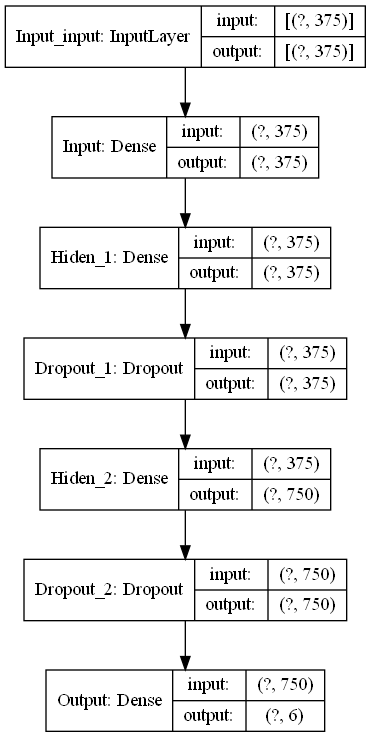

In [72]:
tf.keras.utils.plot_model(model_ANN, to_file= os.path.join(path_models, 'Model_ANN' + norm_type + model_surname + '.png'), show_shapes=True)

### Understanding the column "Param":

- 141,000 parameters is the result of 375 neurons with 375 features + 375  bias values
- 141,000 parameters is the result of 375 neurons with 375 features + 375  bias values
- 282,000 parameters is the result of 750 neurons with 375 features + 750 bias values
- 3,755   parameters is the result of 750 neurons with 5 features  + 5  bias values

In [73]:
print("\n==================================")
print("Training set\n")

print(f'X_train.........: {np.shape(X_train)}')
print(f'y_train.........: {np.shape(y_train)}')
print(f'y_train_OHEV....: {np.shape(y_train_OHEV)}')

print("\n==================================")
print("Testing set\n")

print(f'X_test..........: {np.shape(X_test)}')
print(f'y_test..........: {np.shape(y_test)}')
print(f'y_test_OHEV.....: {np.shape(y_test_OHEV)}')

print("\n==================================")
print("Validation set\n")

print(f'X_val_norm......: {np.shape(X_val_norm)}')
print(f'y_val...........: {np.shape(y_val)}')
print(f'y_OHEV_val......: {np.shape(y_OHEV_val)}')


Training set

X_train.........: (27909, 375)
y_train.........: (27909,)
y_train_OHEV....: (27909, 6)

Testing set

X_test..........: (3101, 375)
y_test..........: (3101,)
y_test_OHEV.....: (3101, 6)

Validation set

X_val_norm......: (3346, 375)
y_val...........: (3346,)
y_OHEV_val......: (3346, 6)


In [74]:
y_train_OHEV

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]])

In [75]:
batch_size_ANN = 32
epochs_ANN     = 350

history_ANN    = model_ANN.fit(X_train, y_train_OHEV,
                               batch_size      = batch_size_ANN,
                               epochs          = epochs_ANN,
                               verbose         = 1,
                               validation_data = (X_test, y_test_OHEV),
                               callbacks       = callbacks_list)

Epoch 1/350
871/873 [============================>.] - ETA: 0s - loss: 0.9710 - accuracy: 0.6477
Epoch 00001: val_accuracy improved from -inf to 0.77556, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_ANN_weights_0_best_norm_windowed.hdf5
873/873 [==============================] - 6s 7ms/step - loss: 0.9706 - accuracy: 0.6478 - val_loss: 0.6507 - val_accuracy: 0.7756
Epoch 2/350
867/873 [============================>.] - ETA: 0s - loss: 0.6274 - accuracy: 0.7800
Epoch 00002: val_accuracy improved from 0.77556 to 0.81877, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_ANN_weights_0_best_norm_windowed.hdf5
873/873 [==============================] - 6s 7ms/step - loss: 0.6265 - accuracy: 0.7802 - val_loss: 0.5184 - val_accuracy: 0.8188
Epoch 3/350
869/873 [============================>.] - ETA: 0s - loss: 0.5351 - accuracy: 0.8115
Epoch 00003: val_accuracy did not improve from 0

Epoch 24/350
871/873 [============================>.] - ETA: 0s - loss: 0.1842 - accuracy: 0.9375
Epoch 00024: val_accuracy did not improve from 0.92067
873/873 [==============================] - 7s 8ms/step - loss: 0.1844 - accuracy: 0.9374 - val_loss: 0.4596 - val_accuracy: 0.8359
Epoch 25/350
871/873 [============================>.] - ETA: 0s - loss: 0.1787 - accuracy: 0.9380
Epoch 00025: val_accuracy did not improve from 0.92067
873/873 [==============================] - 6s 7ms/step - loss: 0.1787 - accuracy: 0.9380 - val_loss: 0.3966 - val_accuracy: 0.8681
Epoch 26/350
869/873 [============================>.] - ETA: 0s - loss: 0.1736 - accuracy: 0.9398
Epoch 00026: val_accuracy did not improve from 0.92067
873/873 [==============================] - 6s 7ms/step - loss: 0.1739 - accuracy: 0.9397 - val_loss: 0.2278 - val_accuracy: 0.9207
Epoch 27/350
867/873 [============================>.] - ETA: 0s - loss: 0.1662 - accuracy: 0.9422
Epoch 00027: val_accuracy did not improve from 0.9

872/873 [============================>.] - ETA: 0s - loss: 0.0808 - accuracy: 0.9722
Epoch 00049: val_accuracy did not improve from 0.95098
873/873 [==============================] - 6s 7ms/step - loss: 0.0808 - accuracy: 0.9722 - val_loss: 0.2289 - val_accuracy: 0.9245
Epoch 50/350
865/873 [============================>.] - ETA: 0s - loss: 0.0785 - accuracy: 0.9740
Epoch 00050: val_accuracy did not improve from 0.95098
873/873 [==============================] - 6s 7ms/step - loss: 0.0786 - accuracy: 0.9740 - val_loss: 0.1826 - val_accuracy: 0.9400
Epoch 51/350
867/873 [============================>.] - ETA: 0s - loss: 0.0770 - accuracy: 0.9742
Epoch 00051: val_accuracy improved from 0.95098 to 0.95227, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_ANN_weights_0_best_norm_windowed.hdf5
873/873 [==============================] - 6s 7ms/step - loss: 0.0768 - accuracy: 0.9743 - val_loss: 0.1543 - val_accuracy: 0.9523
Epoch 52/350
86

866/873 [============================>.] - ETA: 0s - loss: 0.0389 - accuracy: 0.9871
Epoch 00075: val_accuracy did not improve from 0.96163
873/873 [==============================] - 6s 7ms/step - loss: 0.0388 - accuracy: 0.9872 - val_loss: 0.1678 - val_accuracy: 0.9539
Epoch 76/350
871/873 [============================>.] - ETA: 0s - loss: 0.0383 - accuracy: 0.9879
Epoch 00076: val_accuracy did not improve from 0.96163
873/873 [==============================] - 6s 7ms/step - loss: 0.0382 - accuracy: 0.9879 - val_loss: 0.1555 - val_accuracy: 0.9561
Epoch 77/350
867/873 [============================>.] - ETA: 0s - loss: 0.0348 - accuracy: 0.9882
Epoch 00077: val_accuracy did not improve from 0.96163
873/873 [==============================] - 6s 7ms/step - loss: 0.0351 - accuracy: 0.9881 - val_loss: 0.1730 - val_accuracy: 0.9510
Epoch 78/350
866/873 [============================>.] - ETA: 0s - loss: 0.0369 - accuracy: 0.9876
Epoch 00078: val_accuracy improved from 0.96163 to 0.96195, sav

867/873 [============================>.] - ETA: 0s - loss: 0.0213 - accuracy: 0.9935
Epoch 00101: val_accuracy did not improve from 0.96807
873/873 [==============================] - 5s 6ms/step - loss: 0.0213 - accuracy: 0.9936 - val_loss: 0.1654 - val_accuracy: 0.9552
Epoch 102/350
871/873 [============================>.] - ETA: 0s - loss: 0.0216 - accuracy: 0.9927
Epoch 00102: val_accuracy did not improve from 0.96807
873/873 [==============================] - 5s 6ms/step - loss: 0.0215 - accuracy: 0.9927 - val_loss: 0.1391 - val_accuracy: 0.9658
Epoch 103/350
871/873 [============================>.] - ETA: 0s - loss: 0.0198 - accuracy: 0.9939
Epoch 00103: val_accuracy did not improve from 0.96807
873/873 [==============================] - 5s 6ms/step - loss: 0.0198 - accuracy: 0.9939 - val_loss: 0.1653 - val_accuracy: 0.9594
Epoch 104/350
870/873 [============================>.] - ETA: 0s - loss: 0.0215 - accuracy: 0.9930
Epoch 00104: val_accuracy did not improve from 0.96807
873/8

870/873 [============================>.] - ETA: 0s - loss: 0.0110 - accuracy: 0.9972
Epoch 00128: val_accuracy did not improve from 0.96969
873/873 [==============================] - 6s 7ms/step - loss: 0.0110 - accuracy: 0.9972 - val_loss: 0.1357 - val_accuracy: 0.9687
Epoch 129/350
865/873 [============================>.] - ETA: 0s - loss: 0.0103 - accuracy: 0.9971
Epoch 00129: val_accuracy improved from 0.96969 to 0.97098, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_ANN_weights_0_best_norm_windowed.hdf5
873/873 [==============================] - 6s 7ms/step - loss: 0.0102 - accuracy: 0.9972 - val_loss: 0.1316 - val_accuracy: 0.9710
Epoch 130/350
868/873 [============================>.] - ETA: 0s - loss: 0.0102 - accuracy: 0.9971
Epoch 00130: val_accuracy did not improve from 0.97098
873/873 [==============================] - 6s 7ms/step - loss: 0.0101 - accuracy: 0.9971 - val_loss: 0.1306 - val_accuracy: 0.9707
Epoch 131/350

Epoch 156/350
868/873 [============================>.] - ETA: 0s - loss: 0.0065 - accuracy: 0.9985
Epoch 00156: val_accuracy did not improve from 0.97130
873/873 [==============================] - 6s 7ms/step - loss: 0.0065 - accuracy: 0.9985 - val_loss: 0.1570 - val_accuracy: 0.9642
Epoch 157/350
873/873 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 0.9982
Epoch 00157: val_accuracy did not improve from 0.97130
873/873 [==============================] - 6s 7ms/step - loss: 0.0066 - accuracy: 0.9982 - val_loss: 0.1444 - val_accuracy: 0.9681
Epoch 158/350
866/873 [============================>.] - ETA: 0s - loss: 0.0095 - accuracy: 0.9971
Epoch 00158: val_accuracy did not improve from 0.97130
873/873 [==============================] - 6s 7ms/step - loss: 0.0095 - accuracy: 0.9971 - val_loss: 0.1742 - val_accuracy: 0.9603
Epoch 159/350
867/873 [============================>.] - ETA: 0s - loss: 0.0123 - accuracy: 0.9958
Epoch 00159: val_accuracy did not improve from

870/873 [============================>.] - ETA: 0s - loss: 0.0114 - accuracy: 0.9958
Epoch 00184: val_accuracy did not improve from 0.97259
873/873 [==============================] - 6s 7ms/step - loss: 0.0114 - accuracy: 0.9958 - val_loss: 0.1431 - val_accuracy: 0.9684
Epoch 185/350
872/873 [============================>.] - ETA: 0s - loss: 0.0063 - accuracy: 0.9981
Epoch 00185: val_accuracy did not improve from 0.97259
873/873 [==============================] - 7s 8ms/step - loss: 0.0063 - accuracy: 0.9981 - val_loss: 0.1701 - val_accuracy: 0.9623
Epoch 186/350
866/873 [============================>.] - ETA: 0s - loss: 0.0140 - accuracy: 0.9956
Epoch 00186: val_accuracy did not improve from 0.97259
873/873 [==============================] - 7s 7ms/step - loss: 0.0139 - accuracy: 0.9956 - val_loss: 0.1298 - val_accuracy: 0.9700
Epoch 187/350
870/873 [============================>.] - ETA: 0s - loss: 0.0064 - accuracy: 0.9982
Epoch 00187: val_accuracy did not improve from 0.97259
873/8

872/873 [============================>.] - ETA: 0s - loss: 0.0058 - accuracy: 0.9982
Epoch 00212: val_accuracy did not improve from 0.97388
873/873 [==============================] - 6s 7ms/step - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.1891 - val_accuracy: 0.9552
Epoch 213/350
867/873 [============================>.] - ETA: 0s - loss: 0.0066 - accuracy: 0.9979
Epoch 00213: val_accuracy did not improve from 0.97388
873/873 [==============================] - 6s 7ms/step - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.1354 - val_accuracy: 0.9707
Epoch 214/350
869/873 [============================>.] - ETA: 0s - loss: 0.0026 - accuracy: 0.9995
Epoch 00214: val_accuracy did not improve from 0.97388
873/873 [==============================] - 6s 7ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.1543 - val_accuracy: 0.9658
Epoch 215/350
867/873 [============================>.] - ETA: 0s - loss: 0.0042 - accuracy: 0.9988
Epoch 00215: val_accuracy did not improve from 0.97388
873/8

872/873 [============================>.] - ETA: 0s - loss: 0.0044 - accuracy: 0.9986
Epoch 00240: val_accuracy did not improve from 0.97420
873/873 [==============================] - 6s 7ms/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.1506 - val_accuracy: 0.9690
Epoch 241/350
871/873 [============================>.] - ETA: 0s - loss: 0.0025 - accuracy: 0.9995
Epoch 00241: val_accuracy improved from 0.97420 to 0.97452, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_ANN_weights_0_best_norm_windowed.hdf5
873/873 [==============================] - 6s 7ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.1350 - val_accuracy: 0.9745
Epoch 242/350
873/873 [==============================] - ETA: 0s - loss: 0.0023 - accuracy: 0.9996
Epoch 00242: val_accuracy did not improve from 0.97452
873/873 [==============================] - 17s 19ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.1419 - val_accuracy: 0.9726
Epoch 243/3

867/873 [============================>.] - ETA: 0s - loss: 0.0028 - accuracy: 0.9994
Epoch 00268: val_accuracy did not improve from 0.97452
873/873 [==============================] - 5s 6ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.1394 - val_accuracy: 0.9736
Epoch 269/350
866/873 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9999
Epoch 00269: val_accuracy did not improve from 0.97452
873/873 [==============================] - 6s 6ms/step - loss: 0.0013 - accuracy: 0.9999 - val_loss: 0.1403 - val_accuracy: 0.9710
Epoch 270/350
871/873 [============================>.] - ETA: 0s - loss: 0.0024 - accuracy: 0.9993
Epoch 00270: val_accuracy did not improve from 0.97452
873/873 [==============================] - 5s 6ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.1422 - val_accuracy: 0.9726
Epoch 271/350
868/873 [============================>.] - ETA: 0s - loss: 0.0020 - accuracy: 0.9996
Epoch 00271: val_accuracy did not improve from 0.97452
873/8

865/873 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9997
Epoch 00296: val_accuracy did not improve from 0.97485
873/873 [==============================] - 6s 6ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.1380 - val_accuracy: 0.9742
Epoch 297/350
868/873 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9997
Epoch 00297: val_accuracy did not improve from 0.97485
873/873 [==============================] - 6s 7ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.1701 - val_accuracy: 0.9658
Epoch 298/350
868/873 [============================>.] - ETA: 0s - loss: 0.0041 - accuracy: 0.9987
Epoch 00298: val_accuracy did not improve from 0.97485
873/873 [==============================] - 6s 6ms/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.1387 - val_accuracy: 0.9739
Epoch 299/350
865/873 [============================>.] - ETA: 0s - loss: 0.0051 - accuracy: 0.9984
Epoch 00299: val_accuracy did not improve from 0.97485
873/8

873/873 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 0.9976
Epoch 00324: val_accuracy did not improve from 0.97549
873/873 [==============================] - 6s 6ms/step - loss: 0.0066 - accuracy: 0.9976 - val_loss: 0.1687 - val_accuracy: 0.9636
Epoch 325/350
865/873 [============================>.] - ETA: 0s - loss: 0.0040 - accuracy: 0.9989
Epoch 00325: val_accuracy did not improve from 0.97549
873/873 [==============================] - 6s 6ms/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.1316 - val_accuracy: 0.9732
Epoch 326/350
867/873 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9998
Epoch 00326: val_accuracy did not improve from 0.97549
873/873 [==============================] - 6s 6ms/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.1288 - val_accuracy: 0.9726
Epoch 327/350
869/873 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 00327: val_accuracy did not improve from 0.97549
873/8

In [76]:
score_ANN = model_ANN.evaluate(X_test, y_test_OHEV, verbose=0, batch_size = 32)
print('Test loss:', score_ANN[0])
print('Test accuracy:', score_ANN[1])

Test loss: 0.15124692022800446
Test accuracy: 0.9716220498085022


In [77]:
score_ANN[1]

0.9716220498085022

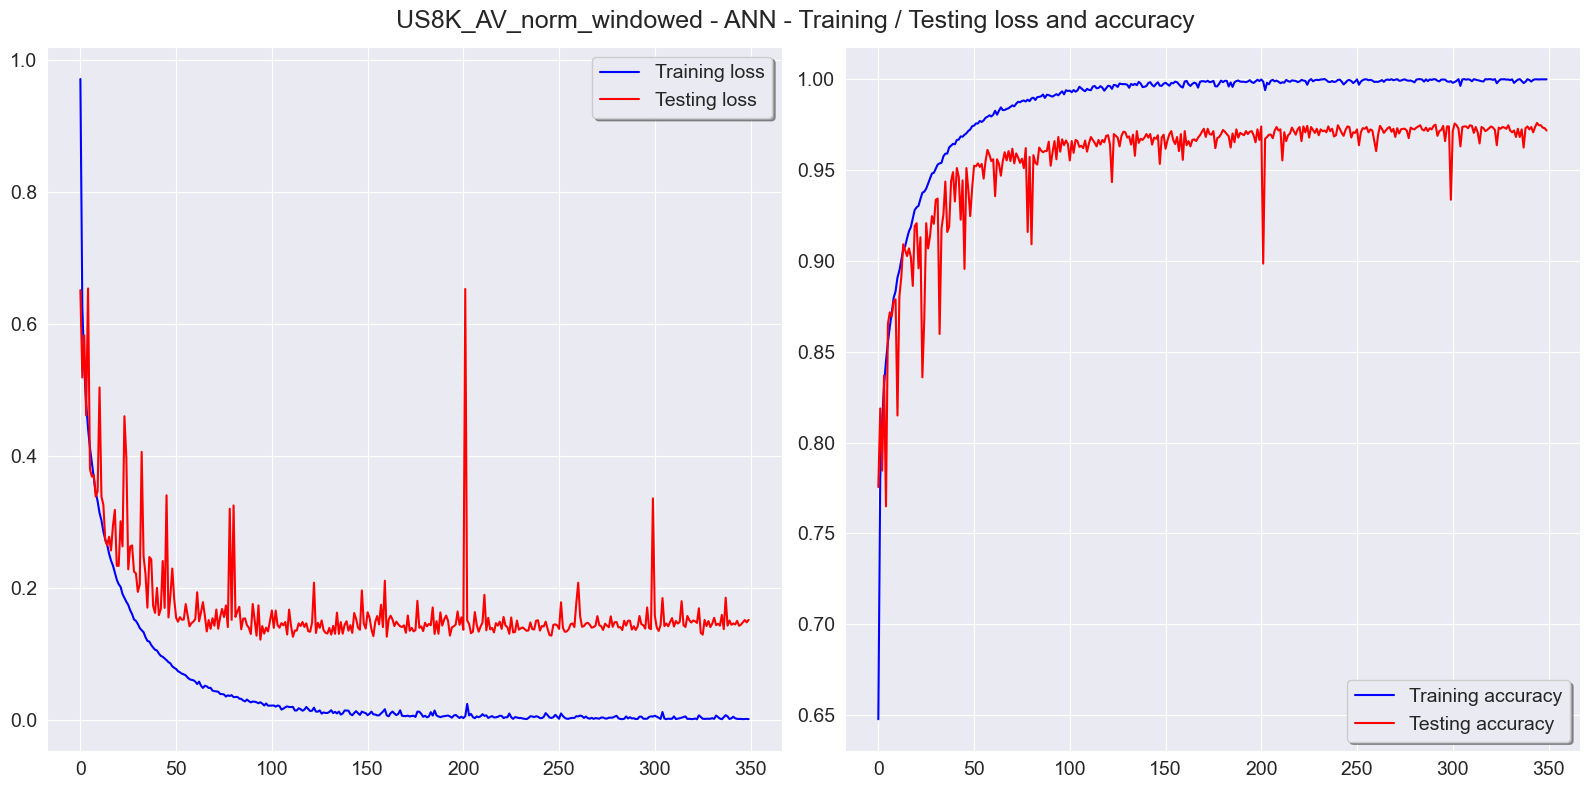

In [78]:
picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

fig, ax = plt.subplots(1,2, figsize=(16,8))
fig.suptitle(nom_dataset + norm_type + model_surname + ' - ANN - Training / Testing loss and accuracy', fontsize = 18)
ax[0].plot(history_ANN.history['loss'], color='b', label="Training loss")
ax[0].plot(history_ANN.history['val_loss'], color='r', label="Testing loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True, fontsize = 14)
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)

ax[1].plot(history_ANN.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_ANN.history['val_accuracy'], color='r',label="Testing accuracy")
legend = ax[1].legend(loc='best', shadow=True, fontsize = 14)
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)

fig.tight_layout()
plt.savefig(os.path.join(path_pic, picture_name))

In [79]:
# save model and architecture to single file (not the best model though)

#model_ANN.save(path_models + "Model_ANN.h5")
#print("Saved model to disk")

In [80]:
y_pred_ANN = np.argmax(model_ANN.predict(X_val_norm),axis=1)
y_pred_ANN

array([3, 3, 3, ..., 1, 1, 1], dtype=int64)

In [81]:
y_test_enc = np.argmax(y_OHEV_val, axis=1)
y_test_enc

array([3, 3, 3, ..., 4, 4, 4], dtype=int64)

In [82]:
metrics_set_ANN = classification_report(y_test_enc, y_pred_ANN, target_names=nom_classes)
print(metrics_set_ANN)

                  precision    recall  f1-score   support

      background       0.87      0.79      0.83       756
        car_horn       0.83      0.89      0.86       252
children_playing       0.76      0.80      0.78       700
        dog_bark       0.68      0.85      0.75       700
         silence       0.68      0.56      0.61       336
           siren       0.90      0.74      0.82       602

        accuracy                           0.78      3346
       macro avg       0.79      0.77      0.78      3346
    weighted avg       0.79      0.78      0.78      3346



In [83]:
# Load the model with the highest accuracy

model_ANN_saved = load_model(os.path.join(path_models, 'Model_ANN_weights_0_best' + norm_type + model_surname + '.hdf5'))
model_ANN_saved.summary()

Model: "ANN_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 375)               141000    
_________________________________________________________________
Hiden_1 (Dense)              (None, 375)               141000    
_________________________________________________________________
Dropout_1 (Dropout)          (None, 375)               0         
_________________________________________________________________
Hiden_2 (Dense)              (None, 750)               282000    
_________________________________________________________________
Dropout_2 (Dropout)          (None, 750)               0         
_________________________________________________________________
Output (Dense)               (None, 6)                 4506      
Total params: 568,506
Trainable params: 568,506
Non-trainable params: 0
_______________________________________________________

In [84]:
score_ANN_saved = model_ANN_saved.evaluate(X_val_norm, y_OHEV_val, verbose=1, batch_size = 32)
print('Test loss:', score_ANN_saved[0])
print('Test accuracy:', score_ANN_saved[1])

105/105 [==============================] - 0s 3ms/step - loss: 2.9545 - accuracy: 0.7824
Test loss: 2.9545063972473145
Test accuracy: 0.7824267745018005


In [85]:
y_pred_ANN_saved = np.argmax(model_ANN_saved.predict(X_val_norm),axis=1)
y_pred_ANN_saved

array([3, 3, 3, ..., 1, 1, 1], dtype=int64)

In [86]:
metrics_set_ANN_saved = classification_report(y_test_enc, y_pred_ANN_saved, target_names=nom_classes)
print(metrics_set_ANN_saved)

                  precision    recall  f1-score   support

      background       0.84      0.82      0.83       756
        car_horn       0.83      0.89      0.86       252
children_playing       0.76      0.80      0.78       700
        dog_bark       0.69      0.83      0.76       700
         silence       0.69      0.57      0.63       336
           siren       0.91      0.73      0.81       602

        accuracy                           0.78      3346
       macro avg       0.79      0.77      0.78      3346
    weighted avg       0.79      0.78      0.78      3346



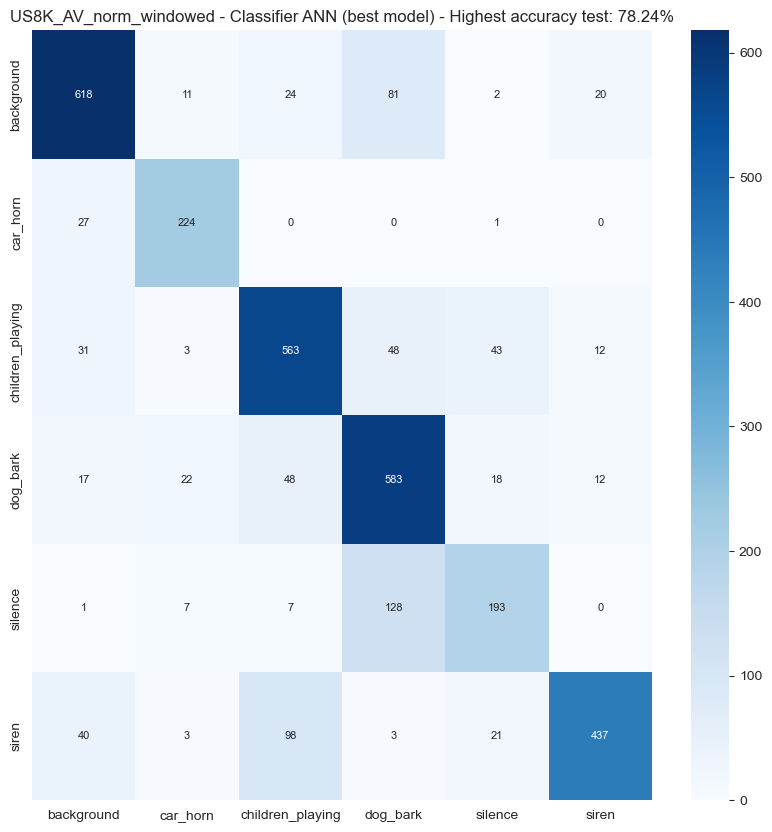

In [87]:
# Simple confusion matrix

picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

conf_matrix = metrics.confusion_matrix(y_test_enc, y_pred_ANN_saved)
title = nom_dataset + norm_type + model_surname + ' - Classifier ANN (best model) - Highest accuracy test: '+ str("{:0.2f}%".format(score_ANN_saved[1]*100))

plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='g', 
            cmap=cmap_cm, 
            annot_kws={"size": 8}, 
            xticklabels=nom_classes, 
            yticklabels=nom_classes)
plt.title(title, fontsize = 12)
plt.savefig(os.path.join(path_pic, picture_name))
plt.show()

In [88]:
model_ANN_saved.layers

In [89]:
for layer in model_ANN_saved.layers:
    print(layer.get_weights())

[array([[-0.01231287, -0.07705268,  0.06958061, ..., -0.00296266,
        -0.05191899,  0.22719799],
       [ 0.05928586, -0.09980812, -0.08065698, ..., -0.05239213,
        -0.00870927,  0.2778031 ],
       [-0.05846456, -0.00446086,  0.02365874, ...,  0.08427078,
         0.01066874,  0.05297194],
       ...,
       [ 0.06332416,  0.06064827, -0.05295174, ..., -0.02122863,
        -0.03482627,  0.06774881],
       [ 0.04538261, -0.01708879, -0.01132141, ..., -0.01662009,
         0.04605388,  0.07290879],
       [ 0.04645682,  0.09208599, -0.06618059, ..., -0.01452035,
        -0.08128044,  0.06772556]], dtype=float32), array([-1.40799698e-03, -2.51766434e-03, -1.15091437e-02, -7.19999545e-04,
        0.00000000e+00,  6.39504520e-03,  2.25340645e-03, -1.23358320e-03,
        1.39577743e-02, -1.41366478e-02, -1.70201965e-04, -2.46970798e-03,
        1.16947358e-02,  3.97953438e-03, -3.45026399e-03,  6.44020550e-03,
        6.45373389e-03, -4.06883704e-03, -1.02910241e-02,  1.52296200e

In [90]:
weights = model_ANN_saved.get_layer('Output').get_weights()
weights[1]

array([ 0.00291515, -0.02182471,  0.03569498, -0.01935694, -0.00362338,
       -0.00815278], dtype=float32)

### CNN 1D

In [91]:
# CNN (Convolutional Neural Network) using Tensorflow

def build_CNN_1D_model(model_name: str, neurons: int):
    
    model = Sequential(name = model_name)

    # 1st conv layer
    model.add(Conv1D(28, 7, activation = 'relu', input_shape = (neurons, 1), name = 'Conv1D_1'))
    #model.add(MaxPooling1D(3, name = 'MaxPool1D_1'))

    # 2nd conv layer
    model.add(Conv1D(34, 5, activation = 'relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.01), padding='same', name = 'Conv1D_2'))
    #model.add(MaxPooling1D(2, name = 'MaxPool1D_2'))
    
    # 3nd conv layer 
    model.add(Conv1D(56, 3, activation = 'relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.01), padding='same', name = 'Conv1D_3'))
    model.add(MaxPooling1D(2, name = 'MaxPool1D_3'))
    model.add(Dropout(0.2, name = 'Dropout_1'))
    
    # 4nd conv layer + dropout 20%
    model.add(Flatten())
    model.add(Dense(50, name = 'Dense'))

    # Final classification layer, with 1 neuron for each output class. Softmax divides the probability of each class.
    model.add(Dense(num_classes, activation = 'softmax', name = 'Output'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adamax', metrics = ['accuracy'])

    return model

In [92]:
monitor = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=50, verbose=1, mode='auto', restore_best_weights=True)

if not os.path.exists(path_models):
    os.makedirs(path_models)
    
filepath       = os.path.join(path_models, 'Model_CNN_1D_weights_0_best' + norm_type + model_surname + '.hdf5')
checkpoint     = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint, monitor]

In [93]:
model_CNN_1D = build_CNN_1D_model('CNN_1D', neurons = n_dim)
model_CNN_1D.summary()

Model: "CNN_1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 369, 28)           224       
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 369, 34)           4794      
_________________________________________________________________
Conv1D_3 (Conv1D)            (None, 369, 56)           5768      
_________________________________________________________________
MaxPool1D_3 (MaxPooling1D)   (None, 184, 56)           0         
_________________________________________________________________
Dropout_1 (Dropout)          (None, 184, 56)           0         
_________________________________________________________________
flatten (Flatten)            (None, 10304)             0         
_________________________________________________________________
Dense (Dense)                (None, 50)                51525

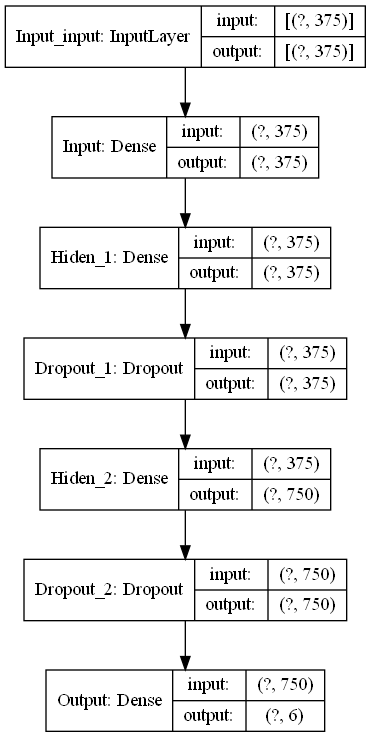

In [94]:
tf.keras.utils.plot_model(model_ANN, to_file= os.path.join(path_models, 'Model_CNN_1D' + norm_type + model_surname + '.png'), show_shapes=True)

### Understanding the column "Param":

1. For `Conv1D` layer:
   - The number of parameters for a `Conv1D` layer is calculated as `(kernel_size * input_channels + 1) * output_channels`, where `kernel_size` is the size of the convolutional kernel, `input_channels` is the number of input channels (1 in this case), and `output_channels` is the number of output channels.

2. For `Dense` layer:
   - The number of parameters for a `Dense` layer is calculated as `(input_units + 1) * output_units`, where `input_units` is the number of input units and `output_units` is the number of output units.
   
3. In the calculation of parameters for a convolutional layer, the term "channels" refers to the number of filters used in that layer.

- 224   parameters is the result of 28 filters * (7 kernels * 1 filter + 1)
- 4,794 parameters is the result of 34 filter * (5 kernels * 28 filters + 1)
- 5,768  parameters is the result of 56 filters * (3 kernels * 34 filters + 1)
- 515,250  parameters is the result of 50 neurons with 10,304 features + 50 bias values
- 255    parameters is the result of 5 neurons with 50 features + 5 bias values

In [95]:
batch_size_CNN_1D = 32
epochs_CNN_1D     = 150

history_CNN_1D    = model_CNN_1D.fit(X_train[..., np.newaxis], y_train_OHEV,
                                     batch_size      = batch_size_CNN_1D,
                                     epochs          = epochs_CNN_1D,
                                     verbose         = 1,
                                     validation_data =(X_test[..., np.newaxis], y_test_OHEV),
                                     callbacks       = callbacks_list)

Epoch 1/150
873/873 [==============================] - ETA: 0s - loss: 0.8246 - accuracy: 0.7303
Epoch 00001: val_accuracy improved from -inf to 0.82554, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_CNN_1D_weights_0_best_norm_windowed.hdf5
873/873 [==============================] - 27s 31ms/step - loss: 0.8246 - accuracy: 0.7303 - val_loss: 0.5763 - val_accuracy: 0.8255
Epoch 2/150
872/873 [============================>.] - ETA: 0s - loss: 0.5606 - accuracy: 0.8235
Epoch 00002: val_accuracy improved from 0.82554 to 0.85166, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_CNN_1D_weights_0_best_norm_windowed.hdf5
873/873 [==============================] - 30s 34ms/step - loss: 0.5606 - accuracy: 0.8235 - val_loss: 0.4784 - val_accuracy: 0.8517
Epoch 3/150
871/873 [============================>.] - ETA: 0s - loss: 0.4974 - accuracy: 0.8435
Epoch 00003: val_accuracy improved fro

871/873 [============================>.] - ETA: 0s - loss: 0.2694 - accuracy: 0.9185
Epoch 00022: val_accuracy improved from 0.91970 to 0.92067, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_CNN_1D_weights_0_best_norm_windowed.hdf5
873/873 [==============================] - 26s 30ms/step - loss: 0.2696 - accuracy: 0.9184 - val_loss: 0.2819 - val_accuracy: 0.9207
Epoch 23/150
871/873 [============================>.] - ETA: 0s - loss: 0.2608 - accuracy: 0.9209
Epoch 00023: val_accuracy did not improve from 0.92067
873/873 [==============================] - 26s 30ms/step - loss: 0.2609 - accuracy: 0.9209 - val_loss: 0.2868 - val_accuracy: 0.9200
Epoch 24/150
871/873 [============================>.] - ETA: 0s - loss: 0.2609 - accuracy: 0.9219
Epoch 00024: val_accuracy did not improve from 0.92067
873/873 [==============================] - 26s 30ms/step - loss: 0.2609 - accuracy: 0.9220 - val_loss: 0.2817 - val_accuracy: 0.9184
Epoch 

Epoch 47/150
871/873 [============================>.] - ETA: 0s - loss: 0.1975 - accuracy: 0.9413
Epoch 00047: val_accuracy improved from 0.93260 to 0.93518, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_CNN_1D_weights_0_best_norm_windowed.hdf5
873/873 [==============================] - 26s 30ms/step - loss: 0.1975 - accuracy: 0.9413 - val_loss: 0.2449 - val_accuracy: 0.9352
Epoch 48/150
871/873 [============================>.] - ETA: 0s - loss: 0.1946 - accuracy: 0.9430
Epoch 00048: val_accuracy did not improve from 0.93518
873/873 [==============================] - 26s 29ms/step - loss: 0.1946 - accuracy: 0.9430 - val_loss: 0.2450 - val_accuracy: 0.9323
Epoch 49/150
871/873 [============================>.] - ETA: 0s - loss: 0.1921 - accuracy: 0.9435
Epoch 00049: val_accuracy did not improve from 0.93518
873/873 [==============================] - 26s 29ms/step - loss: 0.1920 - accuracy: 0.9435 - val_loss: 0.2347 - val_accuracy: 

Epoch 74/150
871/873 [============================>.] - ETA: 0s - loss: 0.1561 - accuracy: 0.9569
Epoch 00074: val_accuracy did not improve from 0.93905
873/873 [==============================] - 26s 30ms/step - loss: 0.1562 - accuracy: 0.9569 - val_loss: 0.2408 - val_accuracy: 0.9336
Epoch 75/150
871/873 [============================>.] - ETA: 0s - loss: 0.1532 - accuracy: 0.9574
Epoch 00075: val_accuracy did not improve from 0.93905
873/873 [==============================] - 26s 30ms/step - loss: 0.1532 - accuracy: 0.9574 - val_loss: 0.2285 - val_accuracy: 0.9384
Epoch 76/150
871/873 [============================>.] - ETA: 0s - loss: 0.1568 - accuracy: 0.9559
Epoch 00076: val_accuracy did not improve from 0.93905
873/873 [==============================] - 26s 29ms/step - loss: 0.1570 - accuracy: 0.9559 - val_loss: 0.2290 - val_accuracy: 0.9381
Epoch 77/150
871/873 [============================>.] - ETA: 0s - loss: 0.1550 - accuracy: 0.9560
Epoch 00077: val_accuracy did not improve fr

871/873 [============================>.] - ETA: 0s - loss: 0.1375 - accuracy: 0.9617
Epoch 00101: val_accuracy did not improve from 0.94324
873/873 [==============================] - 26s 30ms/step - loss: 0.1374 - accuracy: 0.9617 - val_loss: 0.2263 - val_accuracy: 0.9387
Epoch 102/150
871/873 [============================>.] - ETA: 0s - loss: 0.1362 - accuracy: 0.9619
Epoch 00102: val_accuracy improved from 0.94324 to 0.94453, saving model to C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\US8K_AV_saved_models\Model_CNN_1D_weights_0_best_norm_windowed.hdf5
873/873 [==============================] - 26s 30ms/step - loss: 0.1362 - accuracy: 0.9619 - val_loss: 0.2205 - val_accuracy: 0.9445
Epoch 103/150
871/873 [============================>.] - ETA: 0s - loss: 0.1358 - accuracy: 0.9619
Epoch 00103: val_accuracy did not improve from 0.94453
873/873 [==============================] - 26s 29ms/step - loss: 0.1357 - accuracy: 0.9619 - val_loss: 0.2307 - val_accuracy: 0.9400
Epoc

Epoch 128/150
871/873 [============================>.] - ETA: 0s - loss: 0.1219 - accuracy: 0.9672
Epoch 00128: val_accuracy did not improve from 0.94808
873/873 [==============================] - 26s 29ms/step - loss: 0.1220 - accuracy: 0.9671 - val_loss: 0.2274 - val_accuracy: 0.9420
Epoch 129/150
871/873 [============================>.] - ETA: 0s - loss: 0.1209 - accuracy: 0.9675
Epoch 00129: val_accuracy did not improve from 0.94808
873/873 [==============================] - 26s 29ms/step - loss: 0.1210 - accuracy: 0.9674 - val_loss: 0.2192 - val_accuracy: 0.9426
Epoch 130/150
871/873 [============================>.] - ETA: 0s - loss: 0.1201 - accuracy: 0.9676
Epoch 00130: val_accuracy did not improve from 0.94808
873/873 [==============================] - 26s 30ms/step - loss: 0.1201 - accuracy: 0.9675 - val_loss: 0.2408 - val_accuracy: 0.9387
Epoch 131/150
871/873 [============================>.] - ETA: 0s - loss: 0.1201 - accuracy: 0.9668
Epoch 00131: val_accuracy did not improv

In [96]:
score_CNN_1D = model_CNN_1D.evaluate(X_test[..., np.newaxis], y_test_OHEV, verbose=0, batch_size = 32)
print('Test loss:', score_CNN_1D[0])
print('Test accuracy:', score_CNN_1D[1])

Test loss: 0.22664673626422882
Test accuracy: 0.9448565244674683


In [97]:
score_CNN_1D[1]

0.9448565244674683

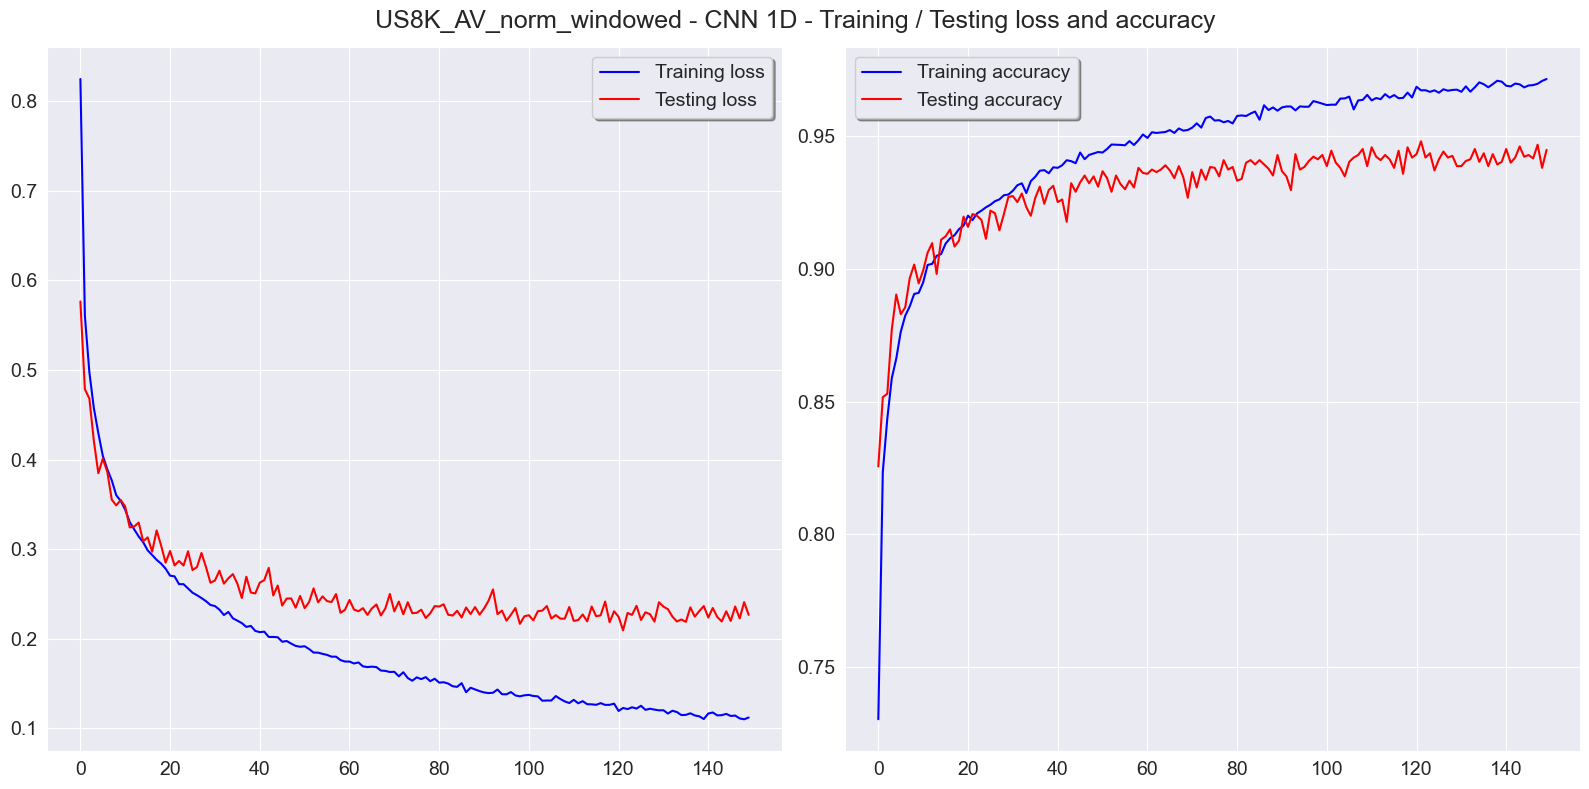

In [98]:
picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

fig, ax = plt.subplots(1,2, figsize=(16,8))
fig.suptitle(nom_dataset + norm_type + model_surname + ' - CNN 1D - Training / Testing loss and accuracy', fontsize = 18)
ax[0].plot(history_CNN_1D.history['loss'], color='b', label="Training loss")
ax[0].plot(history_CNN_1D.history['val_loss'], color='r', label="Testing loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True, fontsize = 14)
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)

ax[1].plot(history_CNN_1D.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_CNN_1D.history['val_accuracy'], color='r',label="Testing accuracy")
legend = ax[1].legend(loc='best', shadow=True, fontsize = 14)
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)

fig.tight_layout()
plt.savefig(os.path.join(path_pic, picture_name))

In [99]:
y_pred_CNN_1D = np.argmax(model_CNN_1D.predict(X_val_norm[..., np.newaxis]),axis=1)
y_pred_CNN_1D

array([3, 3, 3, ..., 5, 5, 5], dtype=int64)

In [100]:
y_test_enc = np.argmax(y_OHEV_val, axis=1)
y_test_enc

array([3, 3, 3, ..., 4, 4, 4], dtype=int64)

In [101]:
metrics_set_CNN_1D = classification_report(y_test_enc, y_pred_CNN_1D, target_names=nom_classes)
print(metrics_set_CNN_1D)

                  precision    recall  f1-score   support

      background       0.87      0.75      0.81       756
        car_horn       0.82      0.92      0.87       252
children_playing       0.65      0.78      0.71       700
        dog_bark       0.76      0.82      0.79       700
         silence       0.74      0.62      0.68       336
           siren       0.84      0.75      0.79       602

        accuracy                           0.77      3346
       macro avg       0.78      0.78      0.78      3346
    weighted avg       0.78      0.77      0.77      3346



In [102]:
# Load the model with the highest accuracy

model_CNN_1D_saved = load_model(os.path.join(path_models, 'Model_CNN_1D_weights_0_best' + norm_type + model_surname + '.hdf5'))
model_CNN_1D_saved.summary()

Model: "CNN_1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 369, 28)           224       
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 369, 34)           4794      
_________________________________________________________________
Conv1D_3 (Conv1D)            (None, 369, 56)           5768      
_________________________________________________________________
MaxPool1D_3 (MaxPooling1D)   (None, 184, 56)           0         
_________________________________________________________________
Dropout_1 (Dropout)          (None, 184, 56)           0         
_________________________________________________________________
flatten (Flatten)            (None, 10304)             0         
_________________________________________________________________
Dense (Dense)                (None, 50)                51525

In [103]:
score_CNN_1D_saved = model_CNN_1D_saved.evaluate(X_val_norm[..., np.newaxis], y_OHEV_val, verbose=1, batch_size = 32)
print('Test loss:', score_CNN_1D_saved[0])
print('Test accuracy:', score_CNN_1D_saved[1])

105/105 [==============================] - 1s 10ms/step - loss: 1.6422 - accuracy: 0.7708
Test loss: 1.6421911716461182
Test accuracy: 0.7707710862159729


In [104]:
y_pred_CNN_1D_saved = np.argmax(model_CNN_1D_saved.predict(X_val_norm[..., np.newaxis]),axis=1)
y_pred_CNN_1D_saved

array([3, 3, 3, ..., 5, 0, 0], dtype=int64)

In [105]:
metrics_set_CNN_1D_saved = classification_report(y_test_enc, y_pred_CNN_1D_saved, target_names=nom_classes)
print(metrics_set_CNN_1D_saved)

                  precision    recall  f1-score   support

      background       0.87      0.78      0.82       756
        car_horn       0.85      0.93      0.89       252
children_playing       0.68      0.78      0.73       700
        dog_bark       0.70      0.83      0.76       700
         silence       0.70      0.52      0.60       336
           siren       0.89      0.75      0.81       602

        accuracy                           0.77      3346
       macro avg       0.78      0.77      0.77      3346
    weighted avg       0.78      0.77      0.77      3346



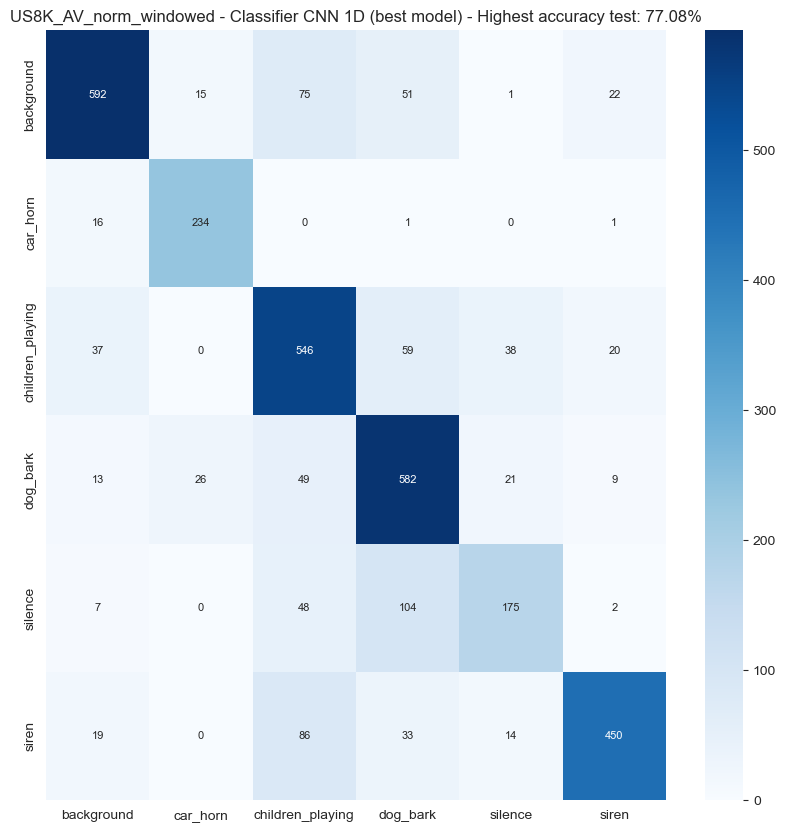

In [106]:
# Simple confusion matrix

picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

conf_matrix = metrics.confusion_matrix(y_test_enc, y_pred_CNN_1D_saved)
title = nom_dataset + norm_type + model_surname + ' - Classifier CNN 1D (best model) - Highest accuracy test: '+ str("{:0.2f}%".format(score_CNN_1D_saved[1]*100))

plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='g', 
            cmap=cmap_cm, 
            annot_kws={"size": 8}, 
            xticklabels=nom_classes, 
            yticklabels=nom_classes)
plt.title(title, fontsize = 12)
plt.savefig(os.path.join(path_pic, picture_name))
plt.show()


In [107]:
model_CNN_1D_saved.layers

In [108]:
for layer in model_CNN_1D_saved.layers:
    print(layer.get_weights())

[array([[[ 0.28788653, -0.3050407 , -0.26670942,  0.31902596,
          0.01224814, -0.17408796, -0.41680795,  0.34780103,
         -0.10801497,  0.4040642 , -0.32701787, -0.4303519 ,
         -0.43301678,  0.40339965, -0.11233513,  0.40587273,
          0.5022393 , -0.500534  , -0.09872536,  0.40418527,
          0.16857283, -0.43007606, -0.04664294,  0.25561437,
          0.47463557,  0.21273354, -0.27003947, -0.30547798]],

       [[-0.69084555,  0.46663207,  0.02237649,  0.36477065,
         -0.04188168, -0.2496077 ,  0.04460561, -0.07883064,
          0.51635045, -0.01793319, -0.05358413, -0.21029288,
          0.7827192 ,  0.28967193, -0.05624785,  0.32800043,
          0.47217715, -0.06370661, -0.24742226,  0.22377943,
          0.37819543, -0.38227656,  0.5374667 , -0.30540884,
          0.18500002,  0.12238988, -0.26820096, -0.3911305 ]],

       [[ 0.39744484,  0.1764074 ,  0.29647392,  0.20841826,
          0.5676932 , -0.27359638, -0.20953587, -0.33339742,
         -0.05232

In [109]:
weights = model_CNN_1D_saved.get_layer('Output').get_weights()
weights[1]

array([-0.0265958 , -0.04265103,  0.01952705,  0.01059637, -0.00287786,
        0.00178679], dtype=float32)

## Metrics for the classifiers


1. Accuracy: Accuracy is a measure of how many correct predictions a model makes overall, i.e., the ratio of correct predictions to the total number of predictions. It's a commonly used metric for evaluating models, but it may not be suitable in certain situations.

2. Precision: Precision measures the ratio of true positives (correctly predicted positive instances) to all instances predicted as positive. It focuses on the accuracy of positive predictions.

3. Recall: Recall, also known as sensitivity or true positive rate, measures the ratio of true positives to all actual positive instances. It focuses on how well a model captures all the positive instances.

4. F1 Score: The F1 score is the harmonic mean of precision and recall. It provides a balanced measure that takes into account both false positives and false negatives. The F1 score is especially useful when you want to strike a balance between precision and recall.


The F1 score is a metric that combines precision and recall, and it is particularly useful in situations where class imbalance or unequal misclassification costs are present. In such contexts, the F1 score can be more informative and meaningful than accuracy.

A context where considering the F1 score makes more sense than accuracy:

**Medical Diagnosis:**

Imagine you're developing a model to diagnose a rare disease, and only 5% of the population has this disease. In this case, you have a significant class imbalance, where the majority of cases are negative (non-disease) and only a small fraction are positive (disease). If you were to use accuracy as the evaluation metric, the model could achieve a high accuracy by simply predicting "negative" for every case, because it would be correct 95% of the time due to the class imbalance. However, this would be entirely useless for detecting the actual disease.

In this scenario, you'd be more interested in the F1 score. The F1 score considers both precision and recall, helping you find a balance between correctly identifying the disease (high recall) and not making too many false positive predictions (high precision). A high F1 score in this context indicates that your model is effective at correctly identifying the disease while minimizing false alarms.

In [ ]:
classifiers = ['ANN', 'CNN_1D']

In [ ]:
# Pipeline to run the classifiers and their metrics

def model_classifiers(classifiers:list, 
                      db: pd.DataFrame, 
                      scalerOpt: str, 
                      use_PCA = False):
    
    # Clear the session to start a new training
    K.clear_session()
 
    es = EarlyStopping(monitor='accuracy', min_delta=0.0001, patience=50, verbose=1, mode='auto', restore_best_weights=True)
    
    count       = 1
    batch_size  = 32
    verbose     = True
    models      = []
    acc_set     = pd.DataFrame(index=None, columns=['Model',
                                                    'Fold',
                                                    'Accuracy(Train)',
                                                    'Accuracy(Val)',
                                                    'F1(Train)',
                                                    'F1(Val)', 
                                                    'Precision(Train)',
                                                    'Precision(Val)', 
                                                    'Recall(Train)',
                                                    'Recall(Val)', 
                                                    'Conf_M',
                                                    'Process_time',                                                     
                                                    'Class_report(Val)'])
    
    for fold in np.unique(db['Fold']):
        print(f"Validation fold: {fold}")

        DB_VAL = db[db['Fold'] == fold]
        DB_TRN = db[db['Fold'] != fold]

        X      = DB_TRN.drop(columns=['Audio','Class_categorical','Class_OHEV', 'Fold'])
        y      = np.array(DB_TRN.Class_categorical.to_list())
        y_OHEV = np.array(DB_TRN.Class_OHEV.to_list())

        X_val      = DB_VAL.drop(columns=['Audio','Class_categorical','Class_OHEV', 'Fold'])
        y_val      = np.array(DB_VAL.Class_categorical.to_list())
        y_OHEV_val = np.array(DB_VAL.Class_OHEV.to_list())
        
        neurons  = X.shape[1]
        
        X_statistics = pd.DataFrame({'mean': X.mean(), 'std': X.std(), 'min': X.min(), 'max': X.max()})

        X_mean   = X_statistics.values[:, 0]
        X_std    = X_statistics.values[:, 1]
        X_min    = X_statistics.values[:, 2]
        X_max    = X_statistics.values[:, 3]
        
        if scalerOpt == "normalization":
            X_train_norm = (X.values - X_min) / (X_max - X_min)
            X_val_norm   = (X_val.values - X_min) / (X_max - X_min)
            batch_type    = '_norm'
            print(f'X_train_norm shape...:{X_train_norm.shape}')
            print(f'X_val_norm shape.....:{X_val_norm.shape}\n')
            
        elif scalerOpt == "standardization":
            X_train_norm = (X.values - X_mean) / X_std
            X_val_norm   = (X_val.values - X_mean) / X_std
            batch_type    = '_std'
            print(f'X_train_norm shape...:{X_train_norm.shape}')
            print(f'X_val_norm shape.....:{X_val_norm.shape}\n')
            
        else:
            sys.exit()
            
        if use_PCA:
            pcaT = PCA()
            pcaT.fit(X_train_norm)
            ratio = pcaT.explained_variance_ratio_

            batch_type = batch_type + '_PCA'

            T           = 0.98
            current_sum = 0
            countComp   = 0

            for element in ratio:
                current_sum += element
                countComp   += 1

                if current_sum >= T:
                    break

            # Print the result
            print("Sum of elements:", current_sum)
            print("Number of elements summed:", countComp)           

            pca          = PCA(n_components = countComp)
            X_train_norm = pca.fit_transform(X_train_norm)
            X_val_norm   = pca.transform(X_val_norm)
            neurons      = countComp
        
        # The training dataset will be 10% reduced compared with the ML techniques, separating a test set to monitor
        # the accuracy during training
        X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_train_norm, y_OHEV, test_size=0.1, random_state=42, stratify=y_OHEV)

        for i in tqdm(range(len(classifiers))):
            
            name         = classifiers[i]
            model_name   = ('Model_' + classifiers[i] + '_' + str(count))
            count        = count + 1
            
            if classifiers[i] == 'ANN':
                
                filepath       = os.path.join(path_models, 'Model_ANN_weights_0_best' + norm_type + model_surname + '.hdf5')
                checkpoint     = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
                callbacks_list = [checkpoint, es]
               
                model = build_ANN_model(model_name, neurons)
                model.summary()
                print(name)
                print(np.shape(X_train_norm))    

                model.fit(X_train_norm, 
                          y_train, 
                          batch_size      = batch_size, 
                          epochs          = 350, 
                          verbose         = verbose,                               
                          validation_data = (X_test_norm, y_test),
                          callbacks       = callbacks_list)
                
                model= load_model(os.path.join(path_models, 'Model_ANN_weights_0_best' + norm_type + model_surname + '.hdf5'))
                print('Best model loaded')

            else:

                filepath       = os.path.join(path_models, 'Model_CNN_1D_weights_0_best' + norm_type + model_surname + '.hdf5')
                checkpoint     = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
                callbacks_list = [checkpoint]                

                X_train_norm = X_train_norm[..., np.newaxis]
                X_val_norm   = X_val_norm[..., np.newaxis]
                X_test_norm  = X_test_norm[..., np.newaxis]

                model = build_CNN_1D_model(model_name, neurons)
                model.summary()
                print(name)
                print(np.shape(X_train_norm))    
                
                model.fit(X_train_norm, 
                          y_train, 
                          batch_size = batch_size, 
                          epochs = 150, 
                          verbose = verbose,                          
                          validation_data = (X_test_norm, y_test),
                          callbacks       = callbacks_list)

                model= load_model(os.path.join(path_models, 'Model_CNN_1D_weights_0_best' + norm_type + model_surname + '.hdf5'))
                print('Best model loaded')

            # Get the model predictions
            y_train_enc = np.argmax(y_train, axis=1)
            y_val_enc   = np.argmax(y_OHEV_val, axis=1)

            y_train_predicted = np.argmax(model.predict(X_train_norm), axis=1)
            
            t_srt             = time.process_time_ns()
            y_val_predicted   = np.argmax(model.predict(X_val_norm), axis=1)
            t_end             = time.process_time_ns()
            proc_time         = ((t_end - t_srt) / 1000000)         
    
            # Compute the classifier metrics
            accuracy_train = metrics.accuracy_score(y_train_enc, y_train_predicted)
            accuracy_val   = metrics.accuracy_score(y_val_enc,  y_val_predicted)

            f1_Score_train = metrics.f1_score(y_train_enc, y_train_predicted, average = 'weighted')
            f1_Score_val   = metrics.f1_score(y_val_enc,  y_val_predicted,  average = 'weighted')

            precision_score_train = metrics.precision_score(y_train_enc, y_train_predicted, average = 'weighted')
            precision_score_val   = metrics.precision_score(y_val_enc,  y_val_predicted,  average = 'weighted')

            recall_score_train = metrics.recall_score(y_train_enc, y_train_predicted, average = 'weighted')
            recall_score_val   = metrics.recall_score(y_val_enc,  y_val_predicted,  average = 'weighted')

            class_report_val = classification_report(y_val_enc, y_val_predicted, target_names = nom_classes)
            print(class_report_val)
            
            # Compute the confusion matrix
            CM = metrics.confusion_matrix(y_val_enc, y_val_predicted)
            y_val_enc       = []
            y_val_predicted = []

            # Store the name, test accuracy results and model
            models.append((name, accuracy_val, model))
            
            K.clear_session()
            del model
                    
            acc_set = pd.concat([acc_set, pd.DataFrame({'Model': [name],
                                                        'Fold': [fold],
                                                        'Accuracy(Train)': [accuracy_train],
                                                        'Accuracy(Val)': [accuracy_val],
                                                        'F1(Train)': [f1_Score_train],
                                                        'F1(Val)': [f1_Score_val],
                                                        'Precision(Train)': [precision_score_train],
                                                        'Precision(Val)': [precision_score_val],
                                                        'Recall(Train)': [recall_score_train],
                                                        'Recall(Val)': [recall_score_val],
                                                        'Conf_M': [CM],
                                                        'Process_time': [proc_time],
                                                        'Class_report(Val)': class_report_val})], ignore_index = True)
                   
    return acc_set, models, batch_type

In [ ]:
# Option for scalerOpt is either "normalization" or "standardization"

metrics_set, models_set, batch_name = model_classifiers(classifiers, 
                                                        DB_from_pkl, 
                                                        scalerOpt = 'standardization',
                                                        use_PCA = True)

In [ ]:
metrics_set

In [ ]:
# Sort by Model and Accuracy test. Reset the index.

metrics_set = metrics_set.sort_values(['Model', 'Accuracy(Val)'], ascending = [True, True]).reset_index()
metrics_set

In [ ]:
metrics_set[['Model', 'Accuracy(Val)']].style.background_gradient(cmap = cmap_cm)

In [ ]:
highest_accuracy = metrics_set.groupby('Model')['Accuracy(Val)'].max()
highest_accuracy

In [ ]:
# Creates a dictionary of each classifier and its data explanation

unique_models = []
results       = {}

for c in classifiers:
    unique_models.append(c)

for model in unique_models:
    result = metrics_set[metrics_set['Model'] == model].describe().round(4)
    results[model] = result

In [ ]:
for model in results.keys():
    print(f'Model...: {model}')
    display(results[model])

In [ ]:
metrics_set_no_cm = metrics_set.drop(['Conf_M', 'Class_report(Val)'], axis=1)
metrics_set_no_cm

In [ ]:
metrics_set_name       = nom_dataset + '_metrics_set_NN' + batch_name +  model_surname + '.pkl'
metrics_set_name_no_cm = nom_dataset + '_metrics_set_NN' + batch_name +  model_surname + '_no_cm.csv'

print(metrics_set_name)
print(metrics_set_name_no_cm)

In [ ]:
# Writes de results to a PKL and CSV file

with open(os.path.join(path_models, metrics_set_name), 'wb') as file:
    pickle.dump(metrics_set, file)
    
metrics_set_no_cm.to_csv(os.path.join(path_models, metrics_set_name_no_cm), sep='\t', encoding='utf-8')

In [ ]:
metrics_set_from_pkl = pd.read_pickle(os.path.join(path_models, metrics_set_name))
metrics_set_from_pkl

In [ ]:
idx = metrics_set.groupby('Model')['Accuracy(Val)'].idxmax()
conf_matrices = metrics_set.loc[idx, ['Model','Accuracy(Val)','Conf_M']]
conf_matrices.set_index('Model', inplace=True)
conf_matrices_dict = conf_matrices.to_dict('index')
conf_matrices_dict

In [ ]:
conf_matrices_dict['ANN']['Conf_M']

In [ ]:
for i, idx in zip(conf_matrices_dict.keys(), range(1, len(conf_matrices_dict) + 1)):
    print(idx)
    print(i)
    print(conf_matrices_dict[i]['Accuracy(Val)'])
    print(conf_matrices_dict[i]['Conf_M'])

In [ ]:
# Plot the confusion matrix for the highest accuracy test classifiers

picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

plt.figure(figsize=(20,8))
plt.suptitle(nom_dataset + model_surname + batch_name + ' - Confusion matrices of the best results for each classifier', fontsize = 16,  y=0.99)
for i, idx in zip(conf_matrices_dict.keys(), range(1, len(conf_matrices_dict) + 1)):
    title = 'Classifier '+ i + ' (Highest accuracy validation of the best models: ' + str("{:0.4f}".format(conf_matrices_dict[i]['Accuracy(Val)'])) +')'
    plt.subplot(1,2,idx)
    plot_confusion_matrix(conf_matrices_dict[i]['Conf_M'],  
                          nom_classes, 
                          title,
                          cmap = None,                          
                          normalize = False)

plt.savefig(os.path.join(path_pic, picture_name))
plt.tight_layout()

In [ ]:
picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

plt.figure(figsize=(18,8))
plt.suptitle(f'{nom_dataset} - Box plot each classifier (batch type: {model_surname + batch_name})', fontsize = 16,  y=0.97)
box_plot = sns.boxplot(data=metrics_set, x="Model", y="Accuracy(Val)", showfliers = True)

medians = list(metrics_set.groupby(['Model'])['Accuracy(Val)'].median())
medians = [round(element, 2) for element in medians]

vertical_offset = metrics_set['Accuracy(Val)'].median()*0.001  # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians[xtick] + vertical_offset, medians[xtick], 
            horizontalalignment='center',size='medium',color='w',weight='semibold')
plt.savefig(os.path.join(path_pic, picture_name))

## Results ESC-10 (including the ML results) - Compiled in Excel

Original x Augmented

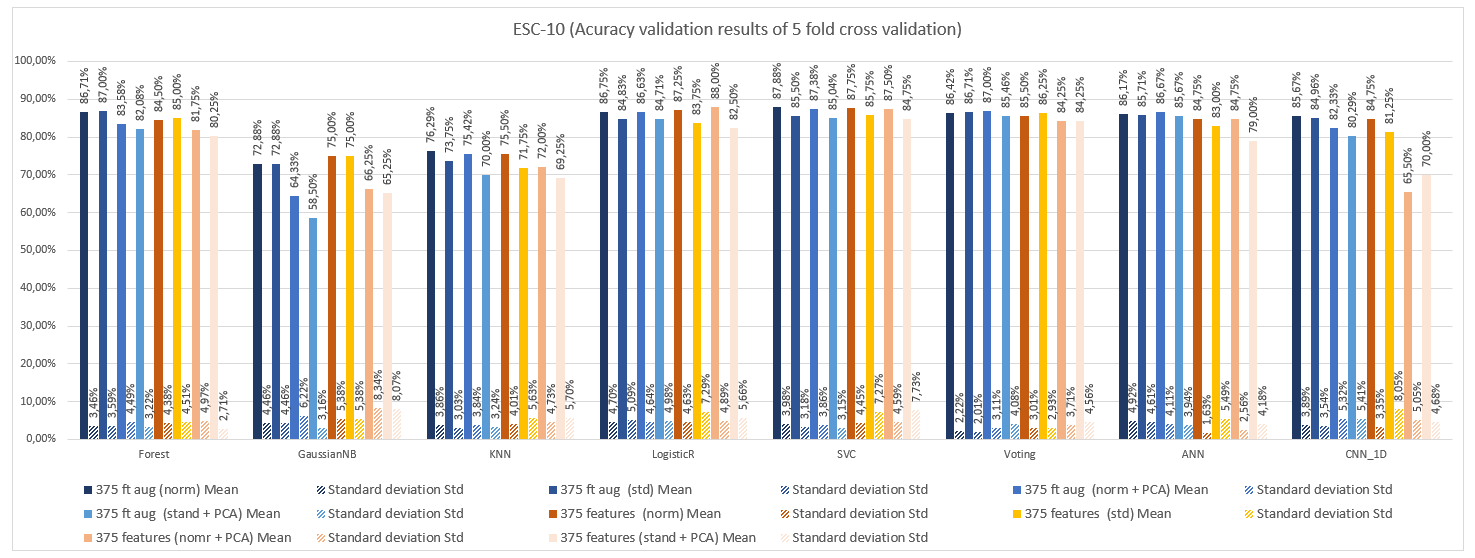

Augmented x Windowed

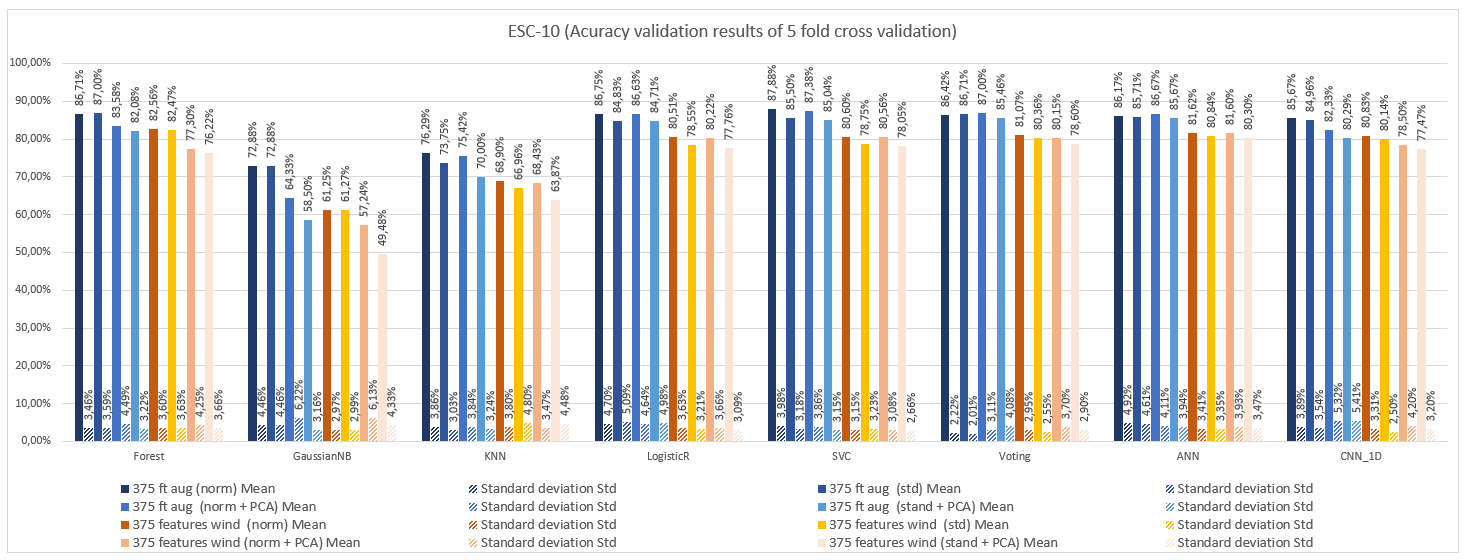

## Results BDLib2 (including the ML results) - Compiled in Excel

Original x Augmented

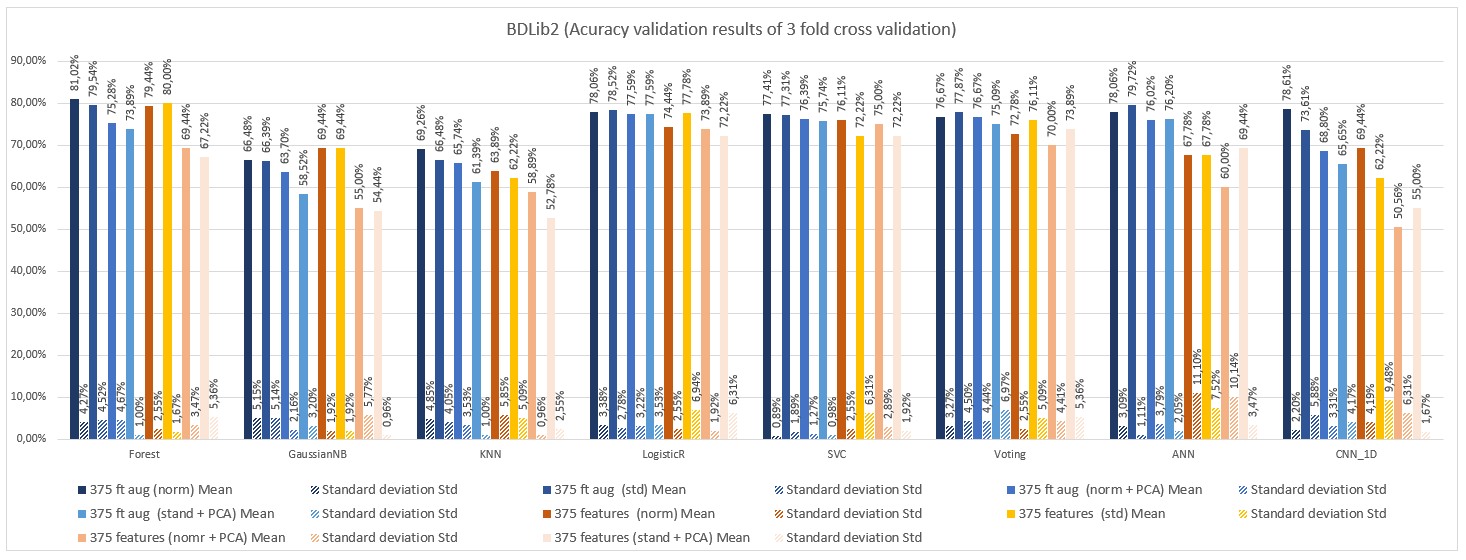

Augmented x Windowed

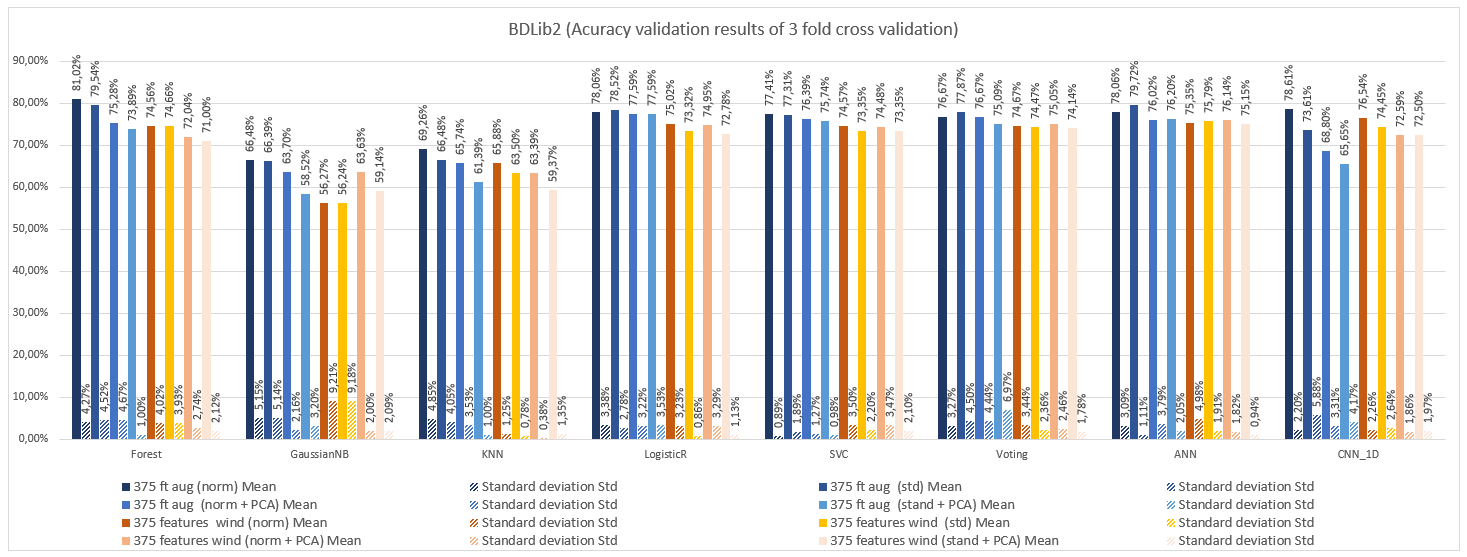

## Results US8K (including the ML results) - Compiled in Excel

Original x Augmented

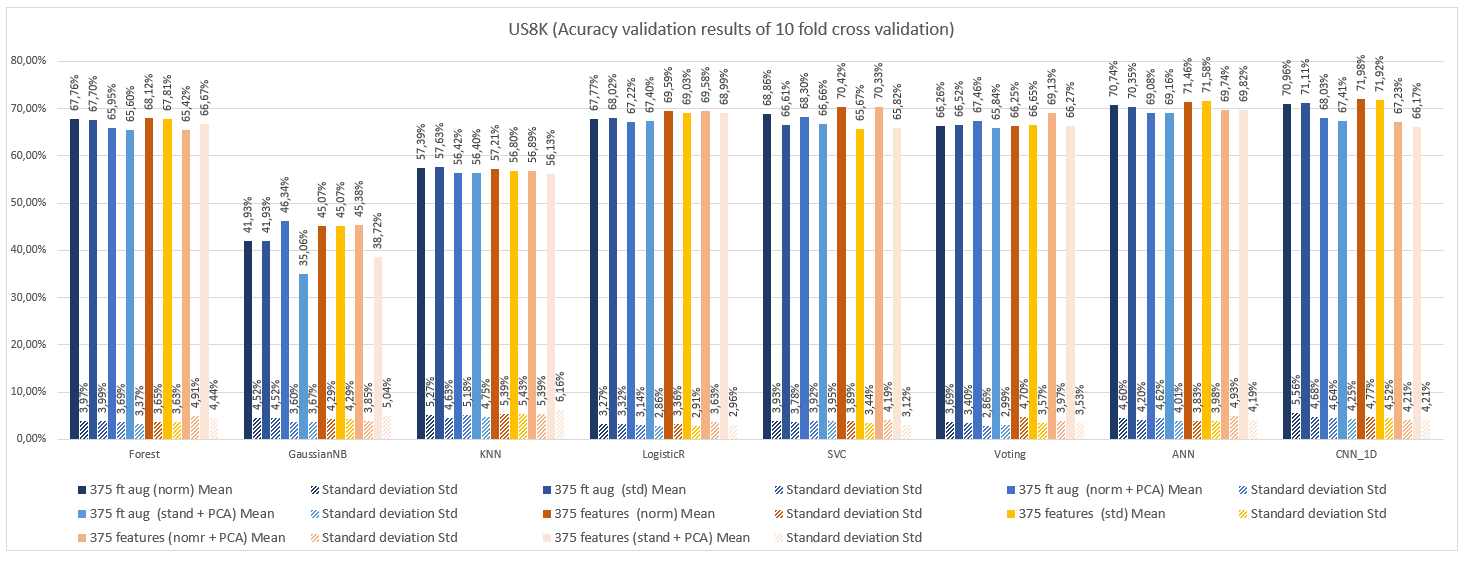

Augmented x Windowed

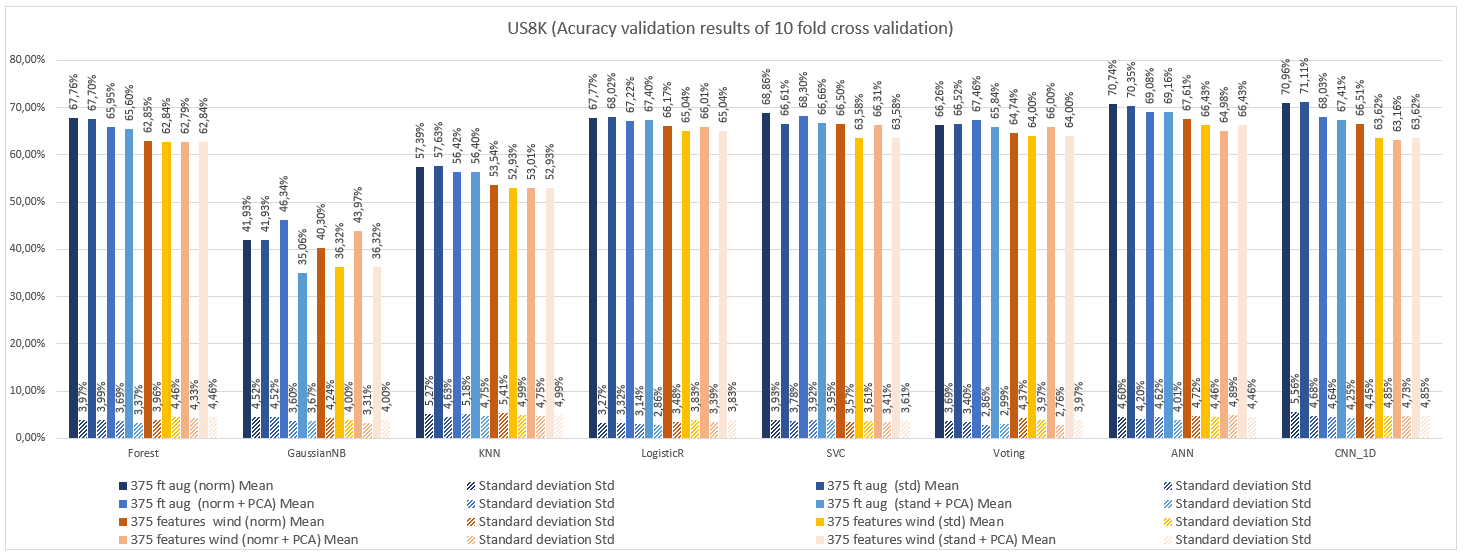

## Results US8K_AV (including the ML results) - Compiled in Excel

Original x Augmented

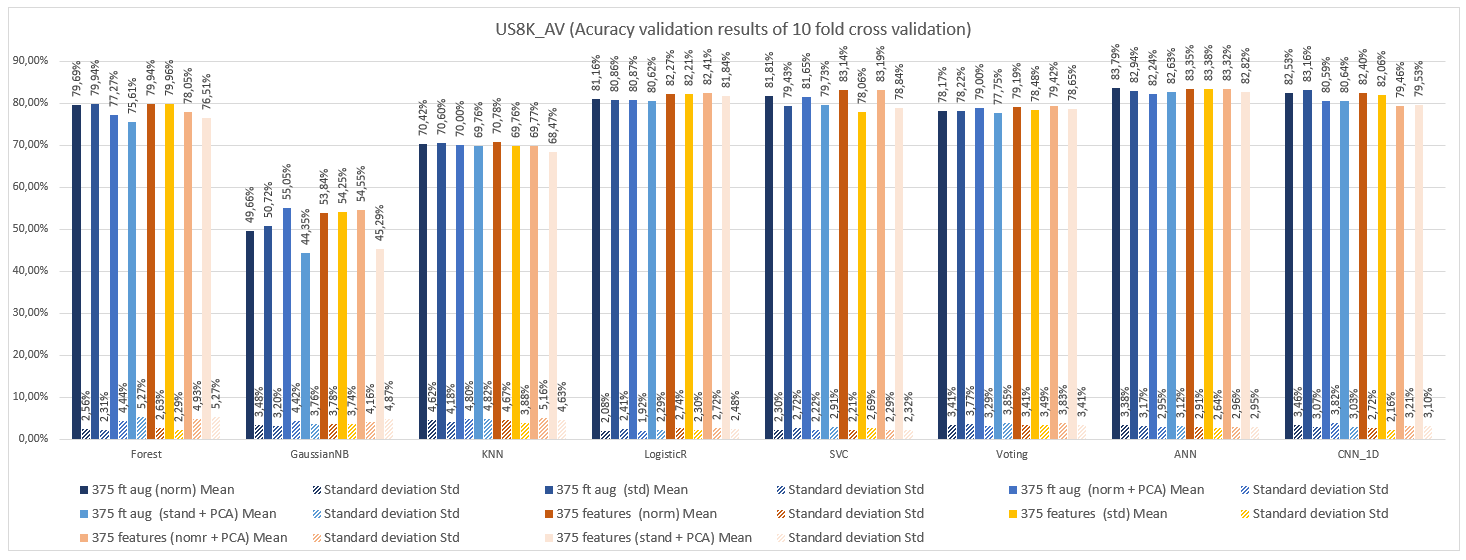

Augmented x Windowed

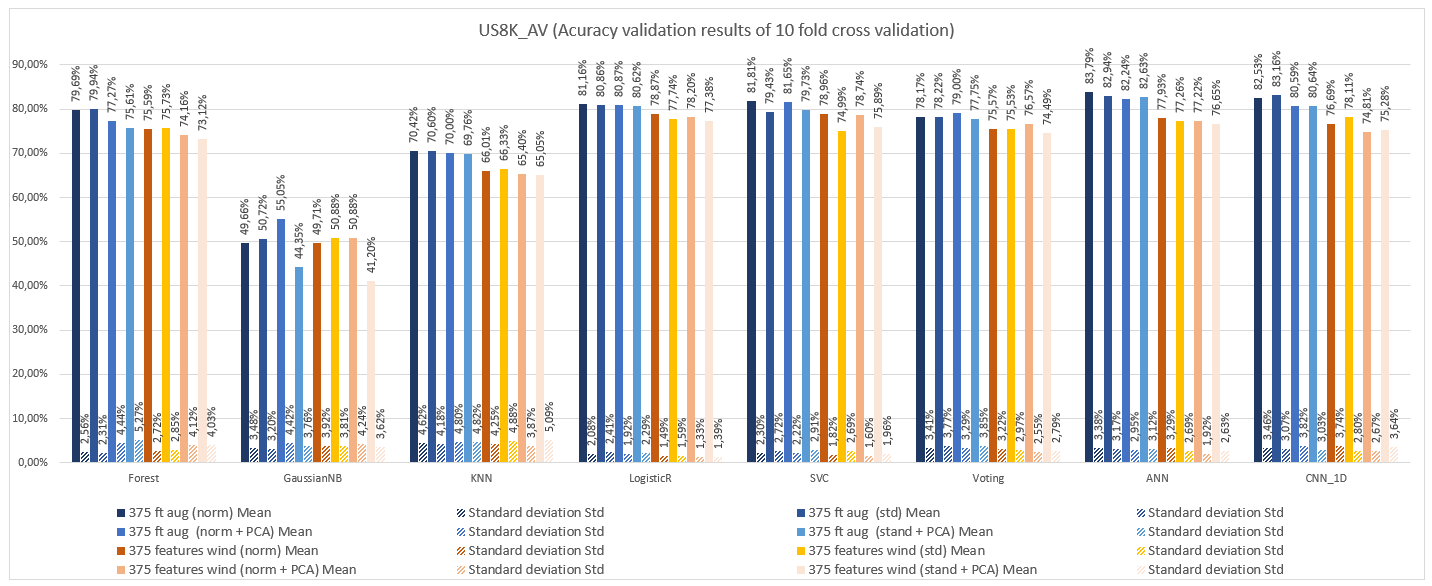

# End of the notebook 

In [ ]:
# 

# 